In [1]:
library(dplyr)
library(stringr)
library(Seurat) # Seurat v4.1.0
library(Matrix)
library(ggplot2)
library(RColorBrewer)
library(viridis)
library(ggrepel)
library(ggbeeswarm)
library(ggpubr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: viridisLite



In [2]:
group.pal = c('d30_60mer-PADRE'= '#e69f00', 'p60mer'='black')
Axis_themes <- theme(plot.title = element_text(size = 8,hjust=0.5),
                     plot.subtitle = element_text(size = 8,hjust=0.5),
                     axis.title = element_text(size = 8),
                     axis.text = element_text(size = 8,color='black'),
                     axis.text.x = element_text(size = 8, angle=45, hjust=1),                     
                     legend.text = element_text(size = 8),
                     legend.title = element_text(size = 8),
                     legend.key.size = unit(.3, 'cm'),
                     #panel.border = element_rect(fill=NA,linewidth=.3,color='black'),
                     strip.text.x = element_text(size = 8),
                     strip.background = element_rect(fill=NA,linewidth=0,color='black'),
                     axis.line = element_line(linewidth = .3),
                     axis.ticks = element_line(linewidth = 0.3))

In [3]:
srat = readRDS('seurat_objects/01_QCed_seurat.RDS')
srat

An object of class Seurat 
16497 features across 4192 samples within 2 assays 
Active assay: RNA (16493 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: HTO
 2 dimensional reductions calculated: pca, umap

In [4]:
colnames(srat@meta.data)
head(srat@meta.data,1)

[1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "nCount_HTO"               
 [5] "nFeature_HTO"              "HTO_maxID"                
 [7] "HTO_secondID"              "HTO_margin"               
 [9] "HTO_classification"        "HTO_classification.global"
[11] "hash.ID"                   "barcode"                  
[13] "cell_id"                   "percent.mt"               
[15] "RNA_snn_res.0.1"           "RNA_snn_res.0.3"          
[17] "RNA_snn_res.0.5"           "RNA_snn_res.0.7"          
[19] "seurat_clusters"           "group"

orig.ident nCount_RNA nFeature_RNA nCount_HTO
dna1_AAACCCCAGGCGGTTT-1 dna1       7555       2295         978       
                        nFeature_HTO HTO_maxID      HTO_secondID   HTO_margin
dna1_AAACCCCAGGCGGTTT-1 3            TotalSeq-C0303 TotalSeq-C0302 2.04843   
                        HTO_classification HTO_classification.global
dna1_AAACCCCAGGCGGTTT-1 TotalSeq-C0303     Singlet                  
                        hash.ID        barcode           
dna1_AAACCCCAGGCGGTTT-1 TotalSeq-C0303 AAACCCCAGGCGGTTT-1
                        cell_id                 percent.mt RNA_snn_res.0.1
dna1_AAACCCCAGGCGGTTT-1 dna1_AAACCCCAGGCGGTTT-1 1.495698   1              
                        RNA_snn_res.0.3 RNA_snn_res.0.5 RNA_snn_res.0.7
dna1_AAACCCCAGGCGGTTT-1 4               4               5              
                        seurat_clusters group          
dna1_AAACCCCAGGCGGTTT-1 5               d30_60mer-PADRE

In [5]:
bcr1=read.csv('denovo_igblast/02_paired_vdj_stringent.csv',row.names=1)
bcr2=read.csv('denovo_igblast/02_paired_vdj_ighv12enrich.csv',row.names=1)
bcr3=read.csv('denovo_igblast/02_paired_vdj_vrc01enrich.csv',row.names=1)

colnames(bcr1)
colnames(bcr2)
head(bcr1,1)

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"

sample barcode            cell_id                 group          
1 dna1   AAACCAAAGACCACGT-1 dna1_AAACCAAAGACCACGT-1 d30_60mer-PADRE
  contig_id_hc                     length_hc reads_hc umis_hc v_call_hc 
1 dna1_AAACCAAAGACCACGT-1_contig_1 547       341      3       IGHV1-9*01
  d_call_hc ⋯ v_call_lc    d_call_lc j_call_lc locus_lc
1           ⋯ IGKV1-117*01 NA        IGKJ2*01  IGK     
  cdr1_lc                              cdr2_lc                       
1 CAGAGCATTGTACATACT...TATGGAAACACCTAT AAAGTT.....................TCC
  cdr3_lc                     junction_lc                       junction_aa_lc
1 TTTCAAGGTTCACATGTTCCGTACACG TGCTTTCAAGGTTCACATGTTCCGTACACGTTC CFQGSHVPYTF   
  sequence_lc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1 TGGGGACTGATCAGTCTCCTCAGGCTGTCTCCTCAGGTTGCCTCCTCAAAATGAAGTTGCCTGTTAGGCTGTTGGTGCTGATGTTCTGGATTCCTGTTTCCAGCAGTGATGTTTTGATGACCCAAACTCCACTCTCCCTGCCTGTCAGTCTTGGAGATCAAGCCTCCATCTCTTGCAGATCTAGTCAGAGCATTGTACATACTTATGGAAACACCTATTTAGAATGGTACCTGCAGAAACCAGGCCAGTCTCCAAAGCTCCTGATCTACAAAGTTTCCAACCGATTTTCTGGGGTCCCAGACAGGTTCAGTGGCAGTGGATCAGGGACAGATTTCACACTCAAGATCAGCAGAGTGGAGGCTGAGGATCTGGGAGTTTATTACTGCTTTCAAGGTTCACATGTTCCGTACACGTTCGGAGGGGGGACCAAGCTGGAAATAAAACGGGCTGATGCTGCACCAACTGTATCCATCTTCCCACCATCCAGTGAGCAGTTAACATCTGGAGGTGCCTCAGTCGTGTGCTTC

In [6]:
table(srat$orig.ident)
table(bcr1$sample)
table(bcr2$sample)


    dna1     dna2 protein1 protein2 
    2234      950      349      659 


    dna1     dna2 protein1 protein2 
    2210     1016      394      726 


    dna1     dna2 protein1 protein2 
    2210     1016      394      726 

In [7]:
vdj1 = bcr1 %>% filter(cell_id %in% srat$cell_id)
table(vdj1$sample)
vdj2 = bcr2 %>% filter(cell_id %in% srat$cell_id)
table(vdj2$sample)
vdj3 = bcr3 %>% filter(cell_id %in% srat$cell_id)
table(vdj2$sample)


    dna1     dna2 protein1 protein2 
    1533      746      263      532 


    dna1     dna2 protein1 protein2 
    1533      746      263      532 


    dna1     dna2 protein1 protein2 
    1533      746      263      532 

In [8]:
table(vdj1$group)


d30_60mer-PADRE          p60mer 
           2279             795 

In [9]:
heavy = read.csv('denovo_igblast/01.5_mapped_to_ighv1-2human.csv',row.names=1) 
colnames(heavy)

[1] "contig_id"        "sample"           "barcode"          "length"          
 [5] "reads"            "umis"             "group"            "v_call"          
 [9] "d_call"           "j_call"           "locus"            "cdr1"            
[13] "cdr2"             "cdr3"             "junction"         "junction_aa"     
[17] "sequence"         "cell_id"          "alignment.score"  "alignment.length"
[21] "identity"         "mouse_v_score"

In [10]:
vdj1$align.score = heavy$alignment.score[match(vdj1$contig_id_hc, heavy$contig_id)]
vdj1$mouse_v_score = heavy$mouse_v_score[match(vdj1$contig_id_hc, heavy$contig_id)]

vdj2$align.score = heavy$alignment.score[match(vdj2$contig_id_hc, heavy$contig_id)]
vdj2$mouse_v_score = heavy$mouse_v_score[match(vdj2$contig_id_hc, heavy$contig_id)]

vdj3$align.score = heavy$alignment.score[match(vdj3$contig_id_hc, heavy$contig_id)]
vdj3$mouse_v_score = heavy$mouse_v_score[match(vdj3$contig_id_hc, heavy$contig_id)]

In [11]:
vdj1$hash.ID = srat$hash.ID[match(vdj1$cell_id, srat$cell_id)]
vdj1 = vdj1 %>% mutate(animal_id = paste(sample,hash.ID,sep='_'))

vdj2$hash.ID = srat$hash.ID[match(vdj2$cell_id, srat$cell_id)]
vdj2 = vdj2 %>% mutate(animal_id = paste(sample,hash.ID,sep='_'))

vdj3$hash.ID = srat$hash.ID[match(vdj3$cell_id, srat$cell_id)]
vdj3 = vdj3 %>% mutate(animal_id = paste(sample,hash.ID,sep='_'))

In [12]:
test = vdj1 %>% count(animal_id)
quantile(test$n)
test %>% filter(n<50)
mouse2remove = c('dna1_TotalSeq-C0302','protein1_TotalSeq-C0303','protein2_TotalSeq-C0302','protein2_TotalSeq-C0303')

0%    25%    50%    75%   100% 
  5.00  46.75 108.50 279.50 906.00

animal_id               n 
1 dna1_TotalSeq-C0302     34
2 protein1_TotalSeq-C0303  5
3 protein2_TotalSeq-C0302  8
4 protein2_TotalSeq-C0303 29

In [13]:
vdj1 = vdj1 %>% filter(! animal_id %in% mouse2remove)
vdj2 = vdj2 %>% filter(! animal_id %in% mouse2remove)
vdj3 = vdj3 %>% filter(! animal_id %in% mouse2remove)

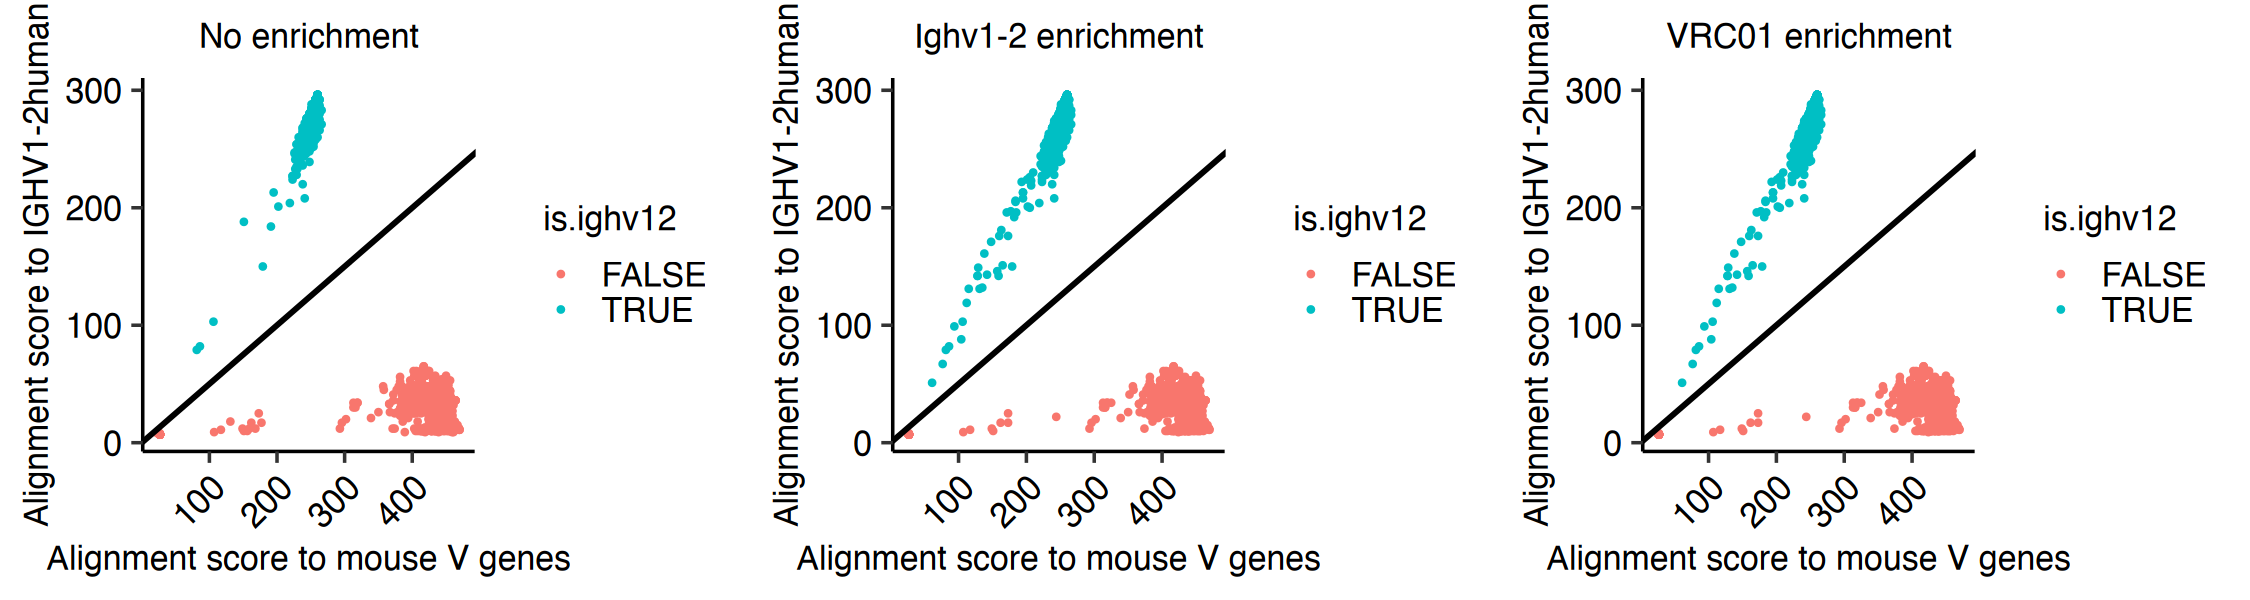

In [14]:
options(repr.plot.res=300,repr.plot.height=2, repr.plot.width=7.5)
p1=vdj1 %>% mutate(is.ighv12= v_call_hc=='IGHV1-2human') %>%
ggplot(aes(x=mouse_v_score, y=align.score, color=is.ighv12))+theme_classic()+
geom_point(size=0.1)+
geom_abline(intercept = 0,slope = 0.5)+
labs(y='Alignment score to IGHV1-2human', x='Alignment score to mouse V genes',title='No enrichment')+
Axis_themes

p2=vdj2 %>% mutate(is.ighv12= v_call_hc=='IGHV1-2human') %>%
ggplot(aes(x=mouse_v_score, y=align.score, color=is.ighv12))+theme_classic()+
geom_point(size=0.1)+
geom_abline(intercept = 0,slope = 0.5)+
labs(y='Alignment score to IGHV1-2human', x='Alignment score to mouse V genes',title='Ighv1-2 enrichment')+
Axis_themes

p3=vdj3 %>% mutate(is.ighv12= v_call_hc=='IGHV1-2human') %>%
ggplot(aes(x=mouse_v_score, y=align.score, color=is.ighv12))+theme_classic()+
geom_point(size=0.1)+
geom_abline(intercept = 0,slope = 0.5)+
labs(y='Alignment score to IGHV1-2human', x='Alignment score to mouse V genes',title='VRC01 enrichment')+
Axis_themes

cowplot::plot_grid(p1, p2, p3,ncol=3)

In [15]:
colnames(vdj1)

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"    "align.score"    "hash.ID"        "animal_id"

In [16]:
vdj1$group = factor(vdj1$group, levels=c('p60mer','d30_60mer-PADRE'))
vdj2$group = factor(vdj2$group, levels=c('p60mer','d30_60mer-PADRE'))
vdj3$group = factor(vdj3$group, levels=c('p60mer','d30_60mer-PADRE'))

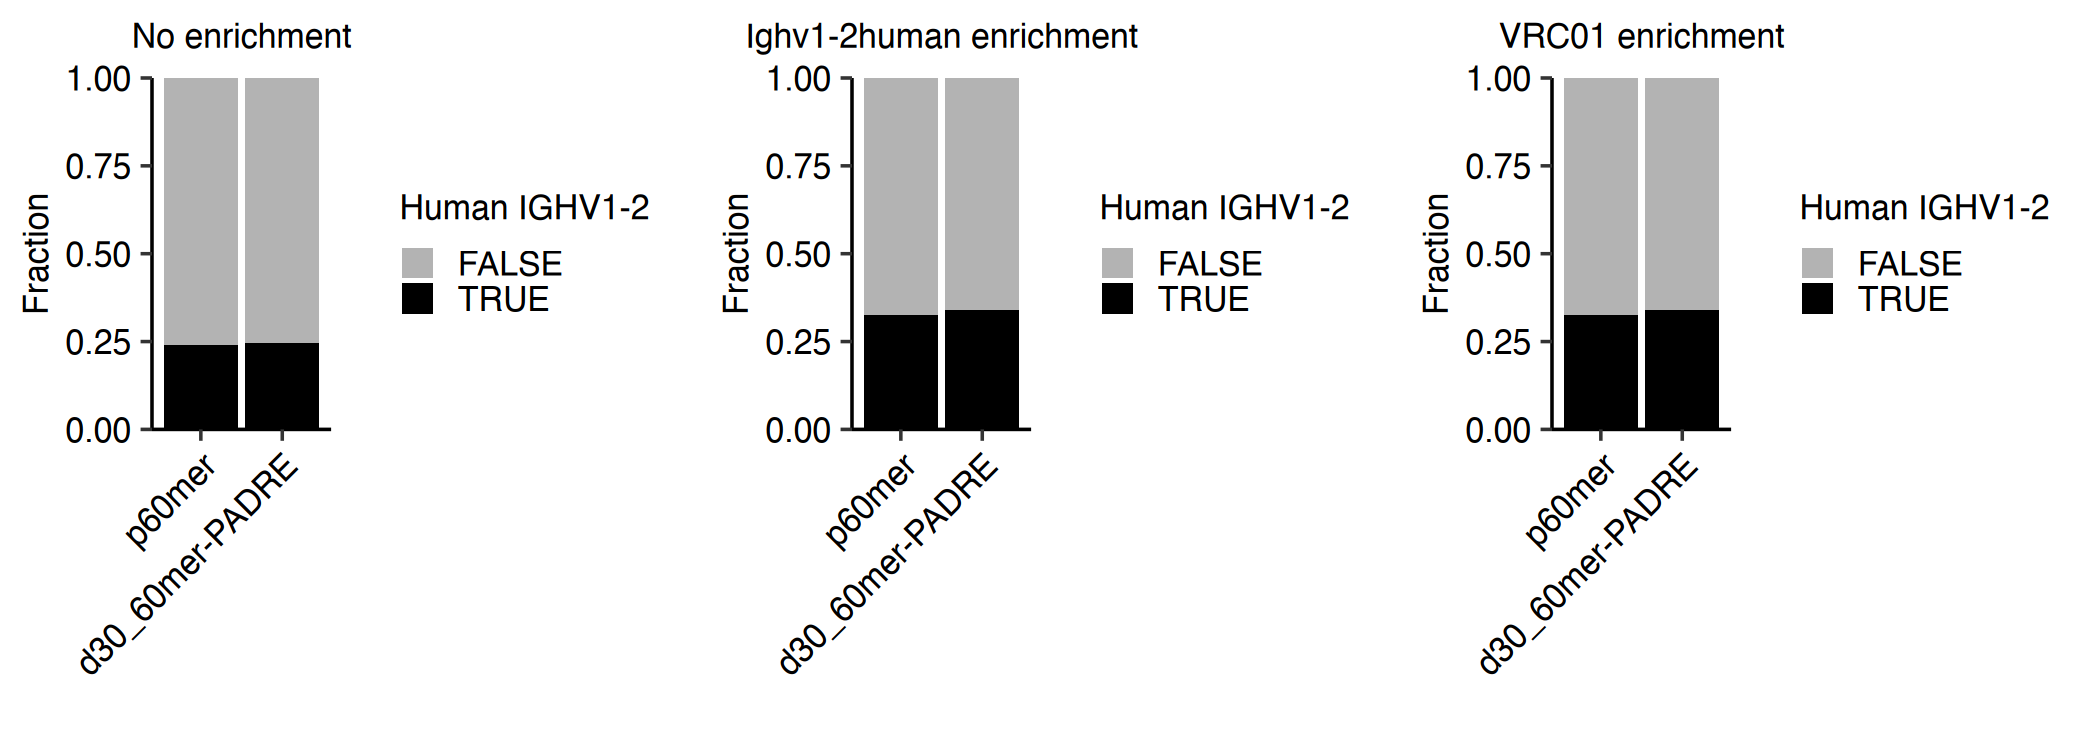

In [17]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=7)
p1 = vdj1 %>% filter(! animal_id %in% mouse2remove) %>%
ggplot(aes(x=group,fill= v_call_hc =='IGHV1-2human')) + theme_classic() +
geom_bar(position = "fill") +
scale_y_continuous(expand=c(0,0)) +
labs( x = "",y = "Fraction",fill = "Human IGHV1-2", title='No enrichment') +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes 

p2 = vdj2 %>% filter(! animal_id %in% mouse2remove) %>%
ggplot(aes(x=group,fill= v_call_hc =='IGHV1-2human')) + theme_classic() +
geom_bar(position = "fill") +
scale_y_continuous(expand=c(0,0)) +
labs( x = "",y = "Fraction",fill = "Human IGHV1-2", title='Ighv1-2human enrichment') +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes 

p3 = vdj3 %>% filter(! animal_id %in% mouse2remove) %>%
ggplot(aes(x=group,fill= v_call_hc =='IGHV1-2human')) + theme_classic() +
geom_bar(position = "fill") +
scale_y_continuous(expand=c(0,0)) +
labs( x = "",y = "Fraction",fill = "Human IGHV1-2", title='VRC01 enrichment') +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes 

cowplot::plot_grid(p1, p2,p3,ncol=3)


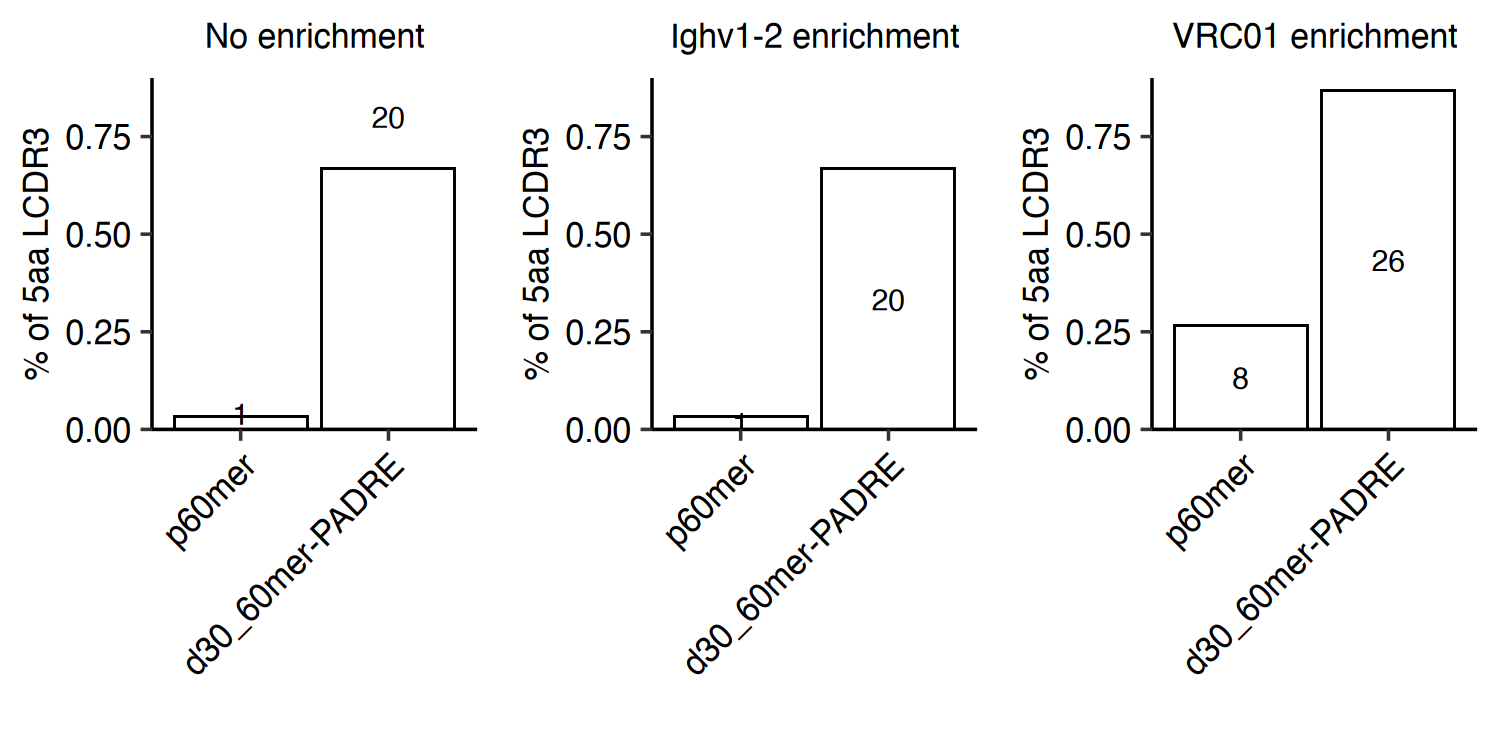

In [18]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=5)

p1= vdj1 %>% mutate(is.5aa = nchar(junction_aa_lc) == 7) %>% 
count(group,is.5aa) %>% group_by(group,percent=n/sum(n)*100) %>% filter(is.5aa) %>%
ggplot(aes(x=group,y = percent)) + theme_classic() +
geom_bar(stat = "identity",fill=NA,color='black',linewidth=0.25) +
geom_text( aes(label = n),position = position_stack(vjust = 1.2), size = 2.5, color = "black") + 
scale_y_continuous(expand=c(0,0),limits = c(0,0.9)) +
labs( x = "",y = "% of 5aa LCDR3",fill = "5aa LCDR3", title='No enrichment') +
Axis_themes 

p2 = vdj2 %>% mutate(is.5aa = nchar(junction_aa_lc) == 7) %>% 
count(group,is.5aa) %>% group_by(group,percent=n/sum(n)*100) %>% filter(is.5aa) %>%
ggplot(aes(x=group,y = percent)) + theme_classic() +
geom_bar(stat = "identity",fill=NA,color='black',linewidth=0.25) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "black") +
scale_y_continuous(expand=c(0,0),limits = c(0,0.9)) +
labs( x = "",y = "% of 5aa LCDR3",fill = "5aa LCDR3", title='Ighv1-2 enrichment') +
Axis_themes 

p3 = vdj3 %>% mutate(is.5aa = nchar(junction_aa_lc) == 7) %>% 
count(group,is.5aa) %>% group_by(group,percent=n/sum(n)*100) %>% filter(is.5aa) %>%
ggplot(aes(x=group,y = percent)) + theme_classic() +
geom_bar(stat = "identity",fill=NA,color='black',linewidth=0.25) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "black") +
scale_y_continuous(expand=c(0,0),limits = c(0,0.9)) +
labs( x = "",y = "% of 5aa LCDR3",fill = "5aa LCDR3", title='VRC01 enrichment') +
Axis_themes 

cowplot::plot_grid(p1, p2,p3,ncol=3)


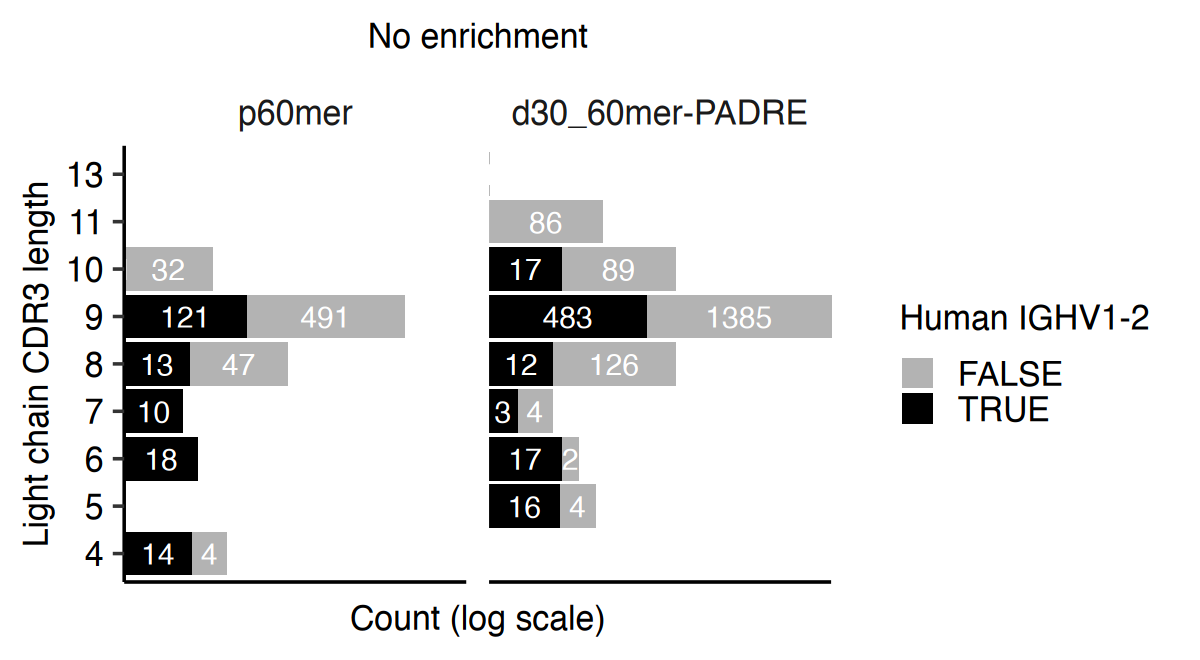

In [19]:
options(repr.plot.res=300, repr.plot.height=2.2, repr.plot.width=4)
df4gg = vdj1 %>% mutate(cdr3l=nchar(junction_aa_lc)) %>% mutate(is.ighv12 = v_call_hc == 'IGHV1-2human') %>% 
count(group,cdr3l, is.ighv12) 

df4gg %>%
ggplot(aes(y = factor(cdr3l - 2), x = n, fill = is.ighv12)) +
theme_classic() +
geom_bar(stat = "identity", position = "stack") +
scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x)),expand = c(0, 0)) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "white") +
facet_wrap("group") +
labs( x = "Count (log scale)",y = "Light chain CDR3 length",fill = "Human IGHV1-2", title='No enrichment') +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes + 
theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

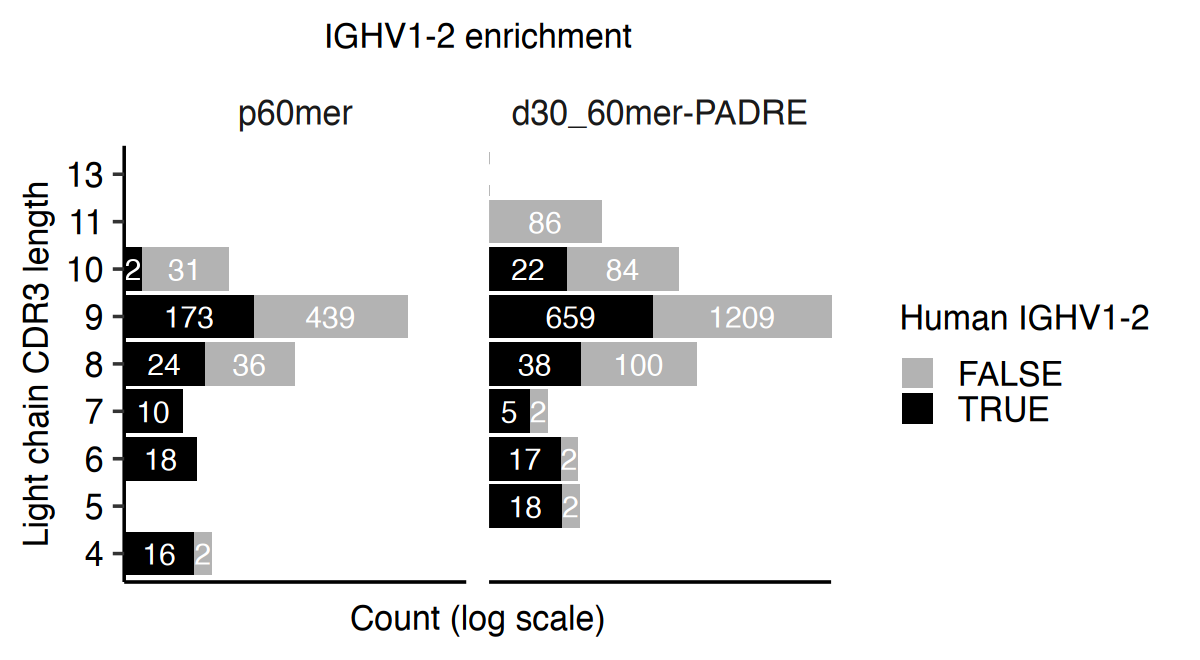

In [20]:
options(repr.plot.res=300, repr.plot.height=2.2, repr.plot.width=4)
df4gg = vdj2 %>% mutate(cdr3l=nchar(junction_aa_lc)) %>% mutate(is.ighv12 = v_call_hc == 'IGHV1-2human') %>% 
count(group,cdr3l, is.ighv12) 

df4gg %>%
ggplot(aes(y = factor(cdr3l - 2), x = n, fill = is.ighv12)) +
theme_classic() +
geom_bar(stat = "identity", position = "stack") +
scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x)),expand = c(0, 0)) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "white") +
facet_wrap("group") +
labs( x = "Count (log scale)",y = "Light chain CDR3 length",fill = "Human IGHV1-2", title='IGHV1-2 enrichment') +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes + 
theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

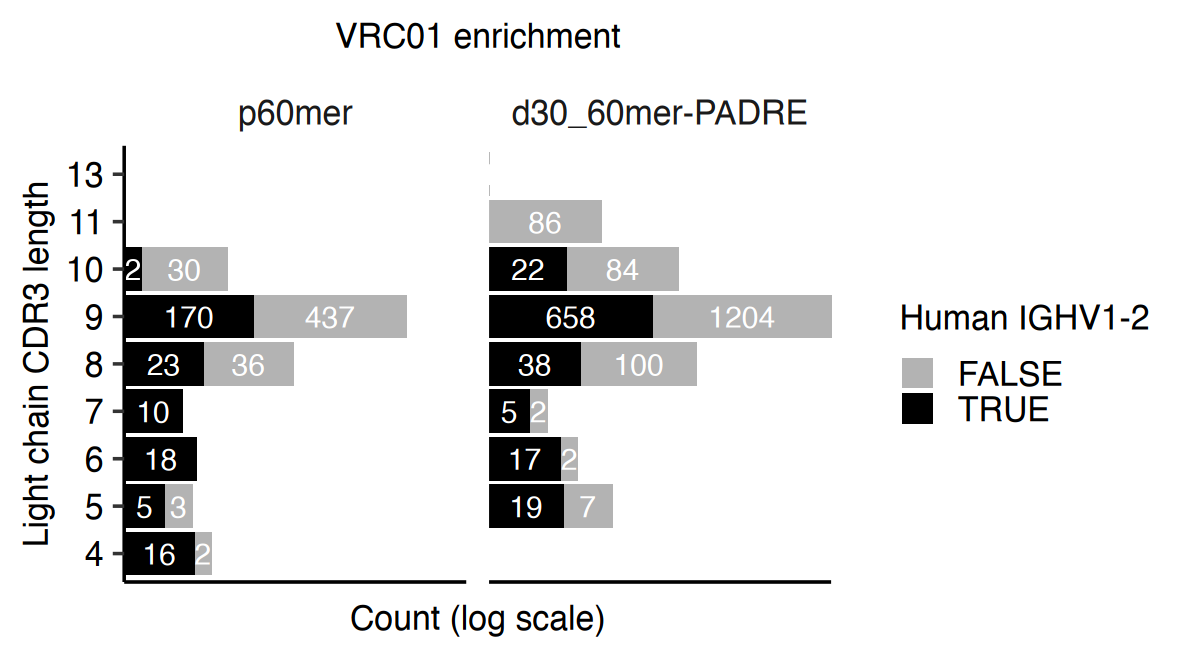

In [21]:
options(repr.plot.res=300, repr.plot.height=2.2, repr.plot.width=4)
df4gg = vdj3 %>% mutate(cdr3l=nchar(junction_aa_lc)) %>% mutate(is.ighv12 = v_call_hc == 'IGHV1-2human') %>% 
count(group,cdr3l, is.ighv12) 

df4gg %>%
ggplot(aes(y = factor(cdr3l - 2), x = n, fill = is.ighv12)) +
theme_classic() +
geom_bar(stat = "identity", position = "stack") +
scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x)),expand = c(0, 0)) +
geom_text( aes(label = n),position = position_stack(vjust = 0.5), size = 2.5, color = "white") +
facet_wrap("group") +
labs( x = "Count (log scale)",y = "Light chain CDR3 length",fill = "Human IGHV1-2", title='VRC01 enrichment') +
scale_fill_manual(values = c("grey70", "black")) +
Axis_themes + 
theme(axis.text.x=element_blank(),axis.ticks.x=element_blank())

In [22]:
vdj1 = vdj1 %>% mutate(is.vrc01 = nchar(junction_aa_lc)==7 & v_call_hc=='IGHV1-2human')
vdj2 = vdj2 %>% mutate(is.vrc01 = nchar(junction_aa_lc)==7 & v_call_hc=='IGHV1-2human')
vdj3 = vdj3 %>% mutate(is.vrc01 = nchar(junction_aa_lc)==7 & v_call_hc=='IGHV1-2human')

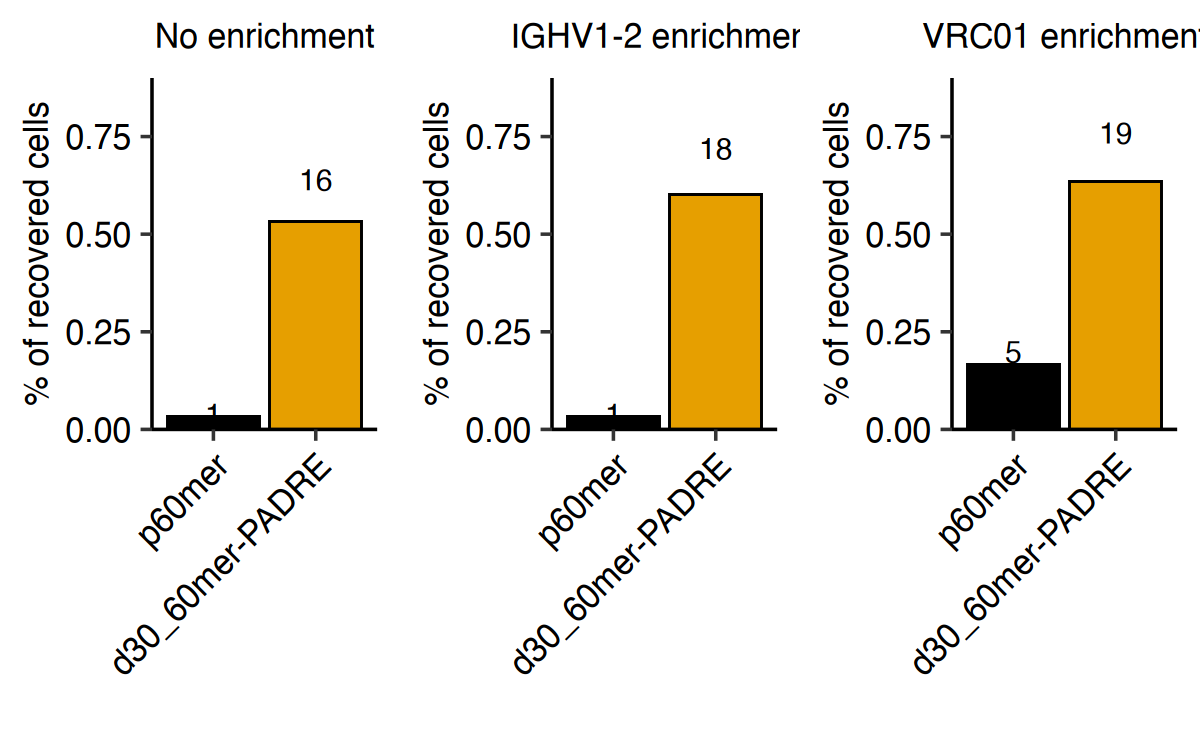

In [23]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=4)

p1= vdj1 %>% count(group,is.vrc01) %>% group_by(group,percent=n/sum(n)*100) %>% filter(is.vrc01) %>%
ggplot(aes(x=group,y = percent, fill=group)) + theme_classic() +
geom_bar(stat = "identity",color='black',linewidth=0.25) +
geom_text( aes(label = n),position = position_stack(vjust = 1.2), size = 2.5, color = "black") + 
scale_y_continuous(expand=c(0,0),limits = c(0,0.9)) +
scale_fill_manual(values = group.pal) +
labs( x = "",y = "% of recovered cells",fill = "5aa LCDR3", title='No enrichment') +
Axis_themes +
theme(legend.position = "none")

p2 = vdj2 %>% #filter(! animal_id %in% mouse2remove) %>% 
count(group,is.vrc01) %>% group_by(group,percent=n/sum(n)*100) %>% filter(is.vrc01) %>%
ggplot(aes(x=group,y = percent, fill=group)) + theme_classic() +
geom_bar(stat = "identity",color='black',linewidth=0.25) +
geom_text( aes(label = n),position = position_stack(vjust = 1.2), size = 2.5, color = "black") +
scale_y_continuous(expand=c(0,0),limits = c(0,0.9)) +
scale_fill_manual(values = group.pal) +
labs( x = "",y = "% of recovered cells",fill = "5aa LCDR3", title='IGHV1-2 enrichment') +
Axis_themes +
theme(legend.position = "none")

p3 = vdj3 %>% count(group,is.vrc01) %>% group_by(group,percent=n/sum(n)*100) %>% filter(is.vrc01) %>%
ggplot(aes(x=group,y = percent, fill=group)) + theme_classic() +
geom_bar(stat = "identity",color='black',linewidth=0.25) +
geom_text( aes(label = n),position = position_stack(vjust = 1.2), size = 2.5, color = "black") +
scale_y_continuous(expand=c(0,0),limits = c(0,0.9)) +
scale_fill_manual(values = group.pal) +
labs( x = "",y = "% of recovered cells",fill = "5aa LCDR3", title='VRC01 enrichment') +
Axis_themes +
theme(legend.position = "none")

cowplot::plot_grid(p1, p2,p3,ncol=3)


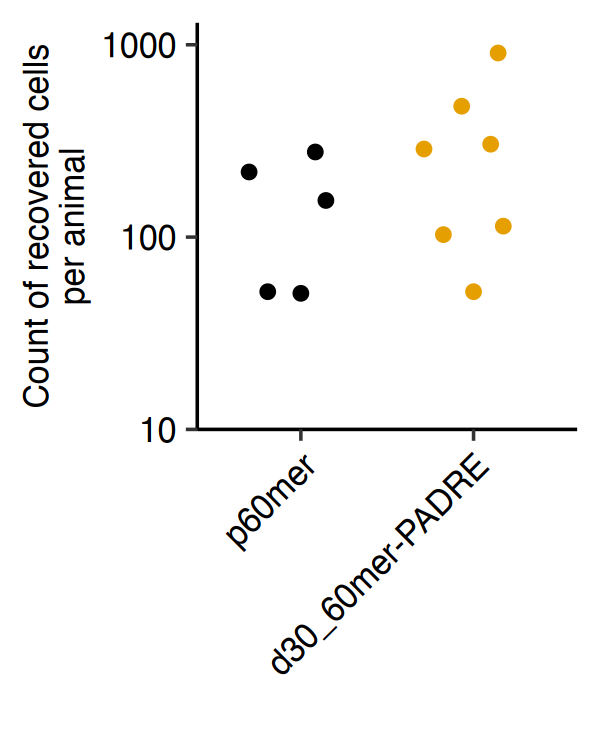

In [24]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=2)
vdj2 %>% filter(! animal_id %in% mouse2remove) %>% count(group,animal_id) %>% 
ggplot(aes(x=group,y=n, color=group))+theme_classic()+
geom_quasirandom(size=1)+
scale_color_manual(values = group.pal) +
scale_y_log10(expand=c(0,0),limits=c(10,1300)) +
labs(x='',y='Count of recovered cells\nper animal',fill='Include VRC01')+
Axis_themes +
theme(legend.position = "none")

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


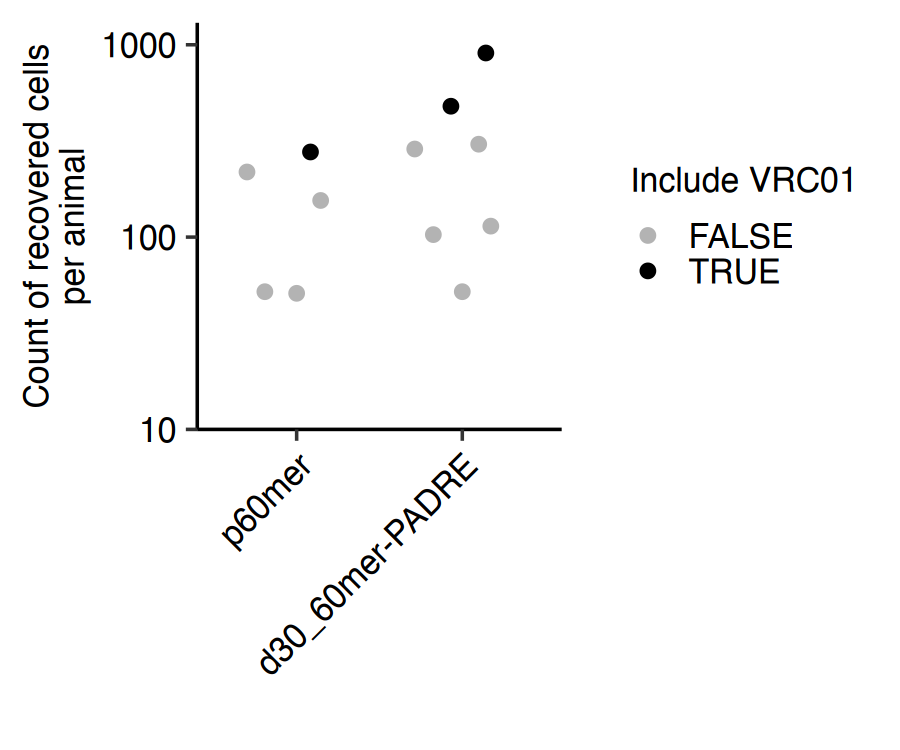

In [25]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=3)
vdj2 %>% filter(! animal_id %in% mouse2remove) %>% count(group,animal_id,is.vrc01) %>% 
group_by(group,animal_id) %>% summarise(is.vrc01=ifelse(n()>1,TRUE,FALSE),n=sum(n)) %>%
ggplot(aes(x=group,y=n, color=is.vrc01))+theme_classic()+
geom_quasirandom(size=1)+
scale_color_manual(values = c("grey70", "black")) +
scale_y_log10(expand=c(0,0),limits=c(10,1300)) +
labs(x='',y='Count of recovered cells\nper animal',color='Include VRC01')+
Axis_themes 

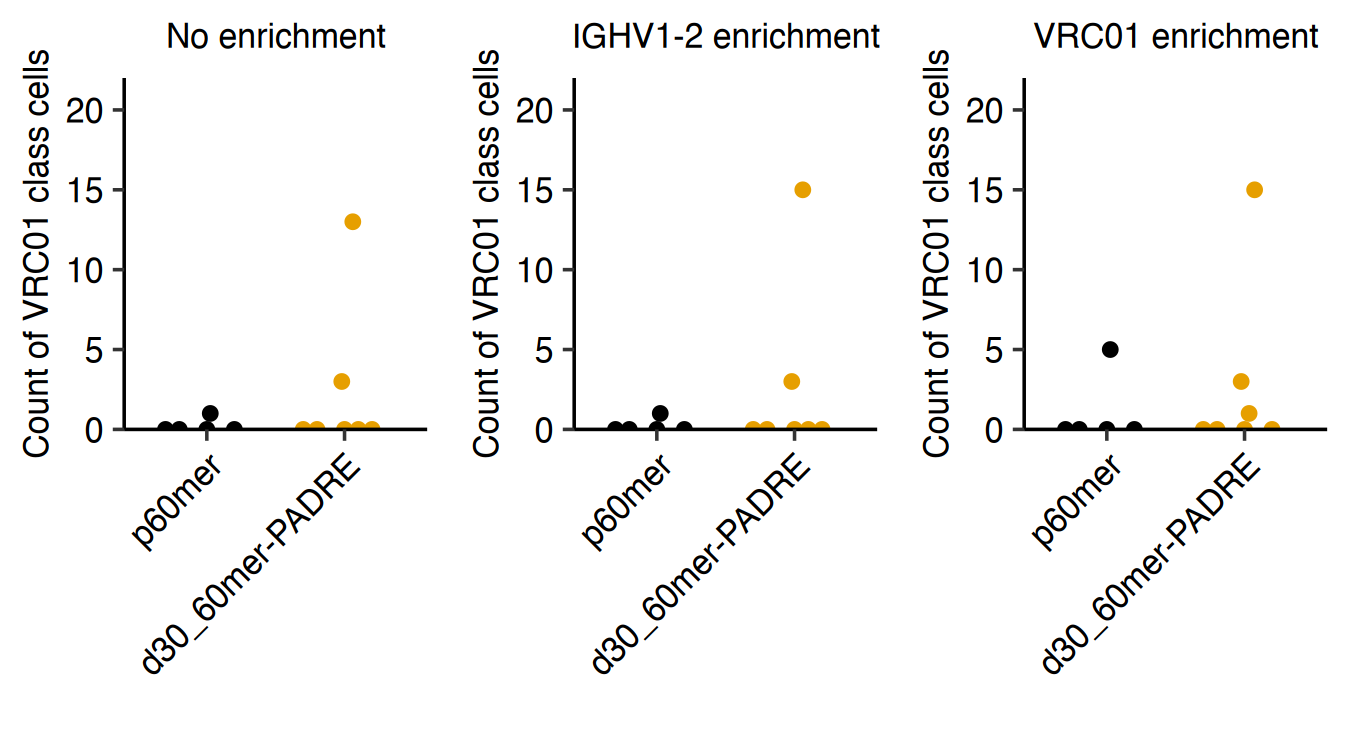

In [26]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=4.5)
p1 = vdj1 %>% filter(! animal_id %in% mouse2remove) %>% 
count(group,animal_id,is.vrc01) %>% tidyr::complete(tidyr::nesting(group,animal_id),is.vrc01) %>% replace(is.na(.),0) %>% 
filter(is.vrc01) %>%
ggplot(aes(x=group,y=n,color=group))+ theme_classic() +
geom_quasirandom(size=1)+
scale_y_continuous(expand=c(0,0),limits=c(0,22)) +
labs(x='',y='Count of VRC01 class cells', title='No enrichment')+
scale_color_manual(values = group.pal) +
Axis_themes +
theme(legend.position = "none")

p2 = vdj2 %>% filter(! animal_id %in% mouse2remove) %>% 
count(group,animal_id,is.vrc01) %>% tidyr::complete(tidyr::nesting(group,animal_id),is.vrc01) %>% replace(is.na(.),0) %>% 
filter(is.vrc01) %>%
ggplot(aes(x=group,y=n,color=group))+ theme_classic() +
geom_quasirandom(size=1)+
scale_y_continuous(expand=c(0,0),limits=c(0,22)) +
labs(x='',y='Count of VRC01 class cells', title='IGHV1-2 enrichment')+
scale_color_manual(values = group.pal) +
Axis_themes +

theme(legend.position = "none")
p3 = vdj3 %>% filter(! animal_id %in% mouse2remove) %>% 
count(group,animal_id,is.vrc01) %>% tidyr::complete(tidyr::nesting(group,animal_id),is.vrc01) %>% replace(is.na(.),0) %>% 
filter(is.vrc01) %>%
ggplot(aes(x=group,y=n,color=group))+ theme_classic() +
geom_quasirandom(size=1)+
scale_y_continuous(expand=c(0,0),limits=c(0,22)) +
labs(x='',y='Count of VRC01 class cells', title='VRC01 enrichment')+
scale_color_manual(values = group.pal) +
Axis_themes +
theme(legend.position = "none")

cowplot::plot_grid(p1, p2,p3,ncol=3)

In [169]:
srat$bcr_recovery = srat$cell_id %in% vdj1$cell_id

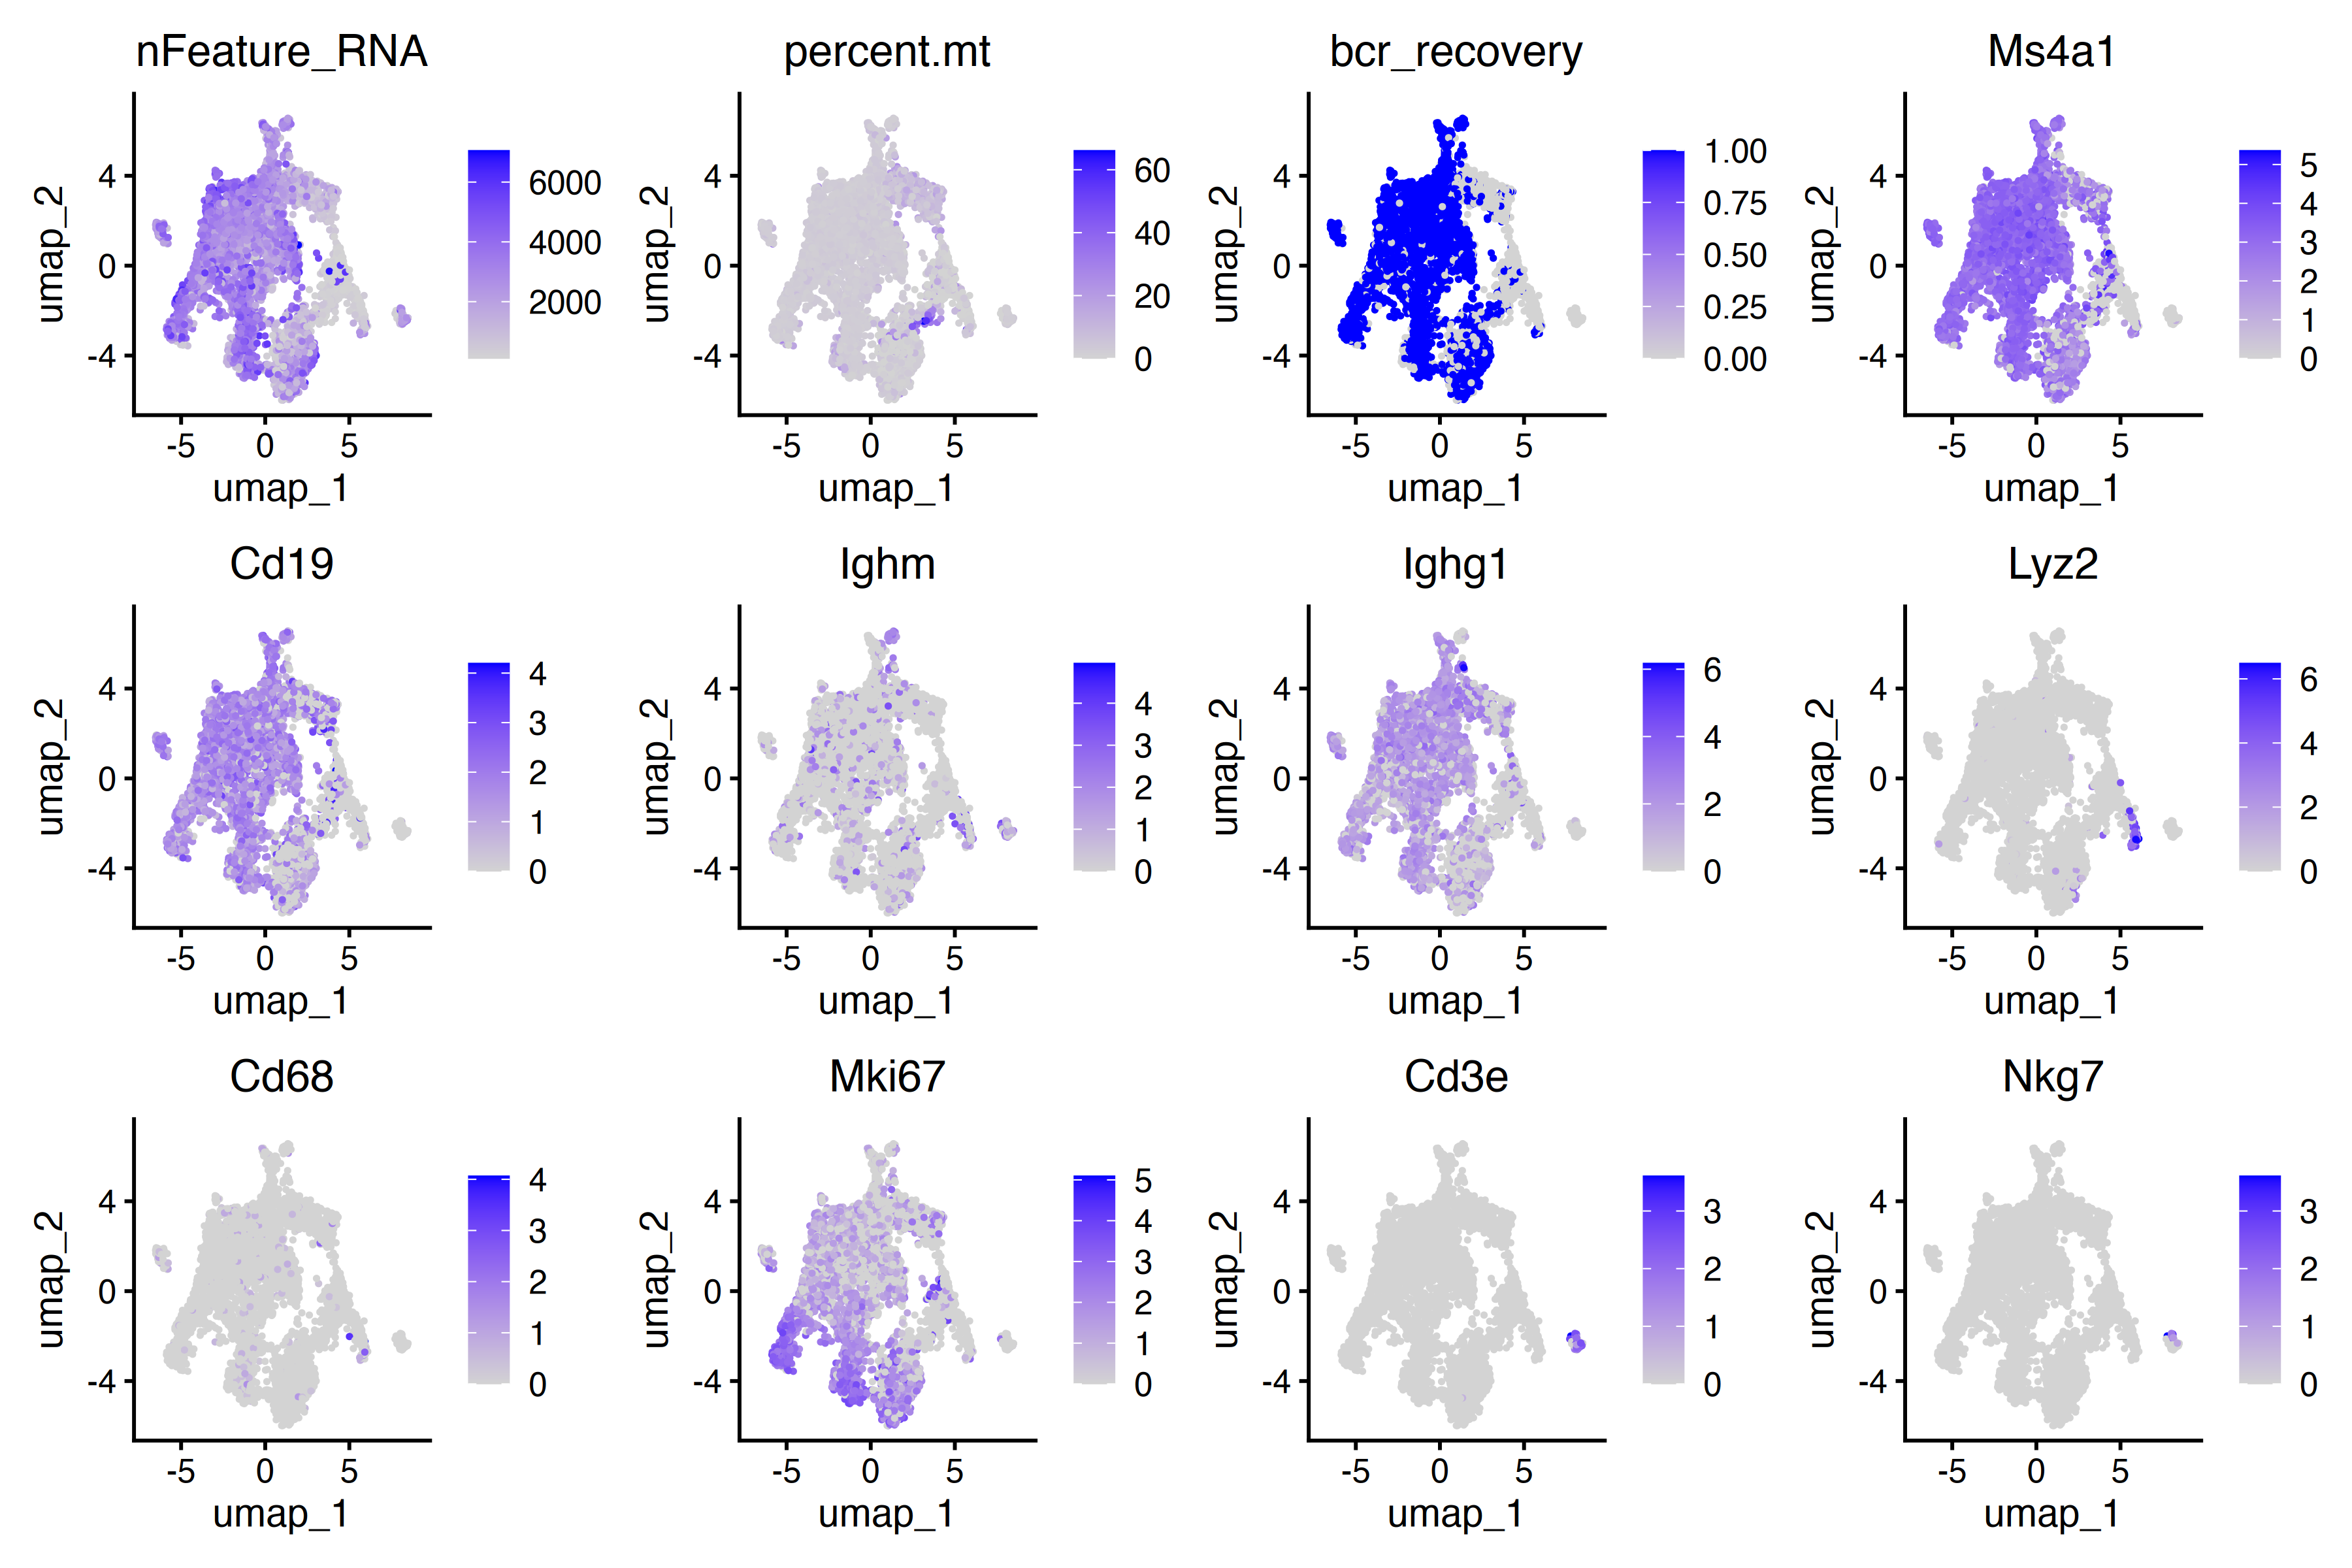

In [179]:
options(repr.plot.width=12, repr.plot.height=8)
FeaturePlot(srat,c('nFeature_RNA','percent.mt','bcr_recovery','Ms4a1','Cd19','Ighm','Ighg1','Lyz2','Cd68','Mki67','Cd3e','Nkg7'))

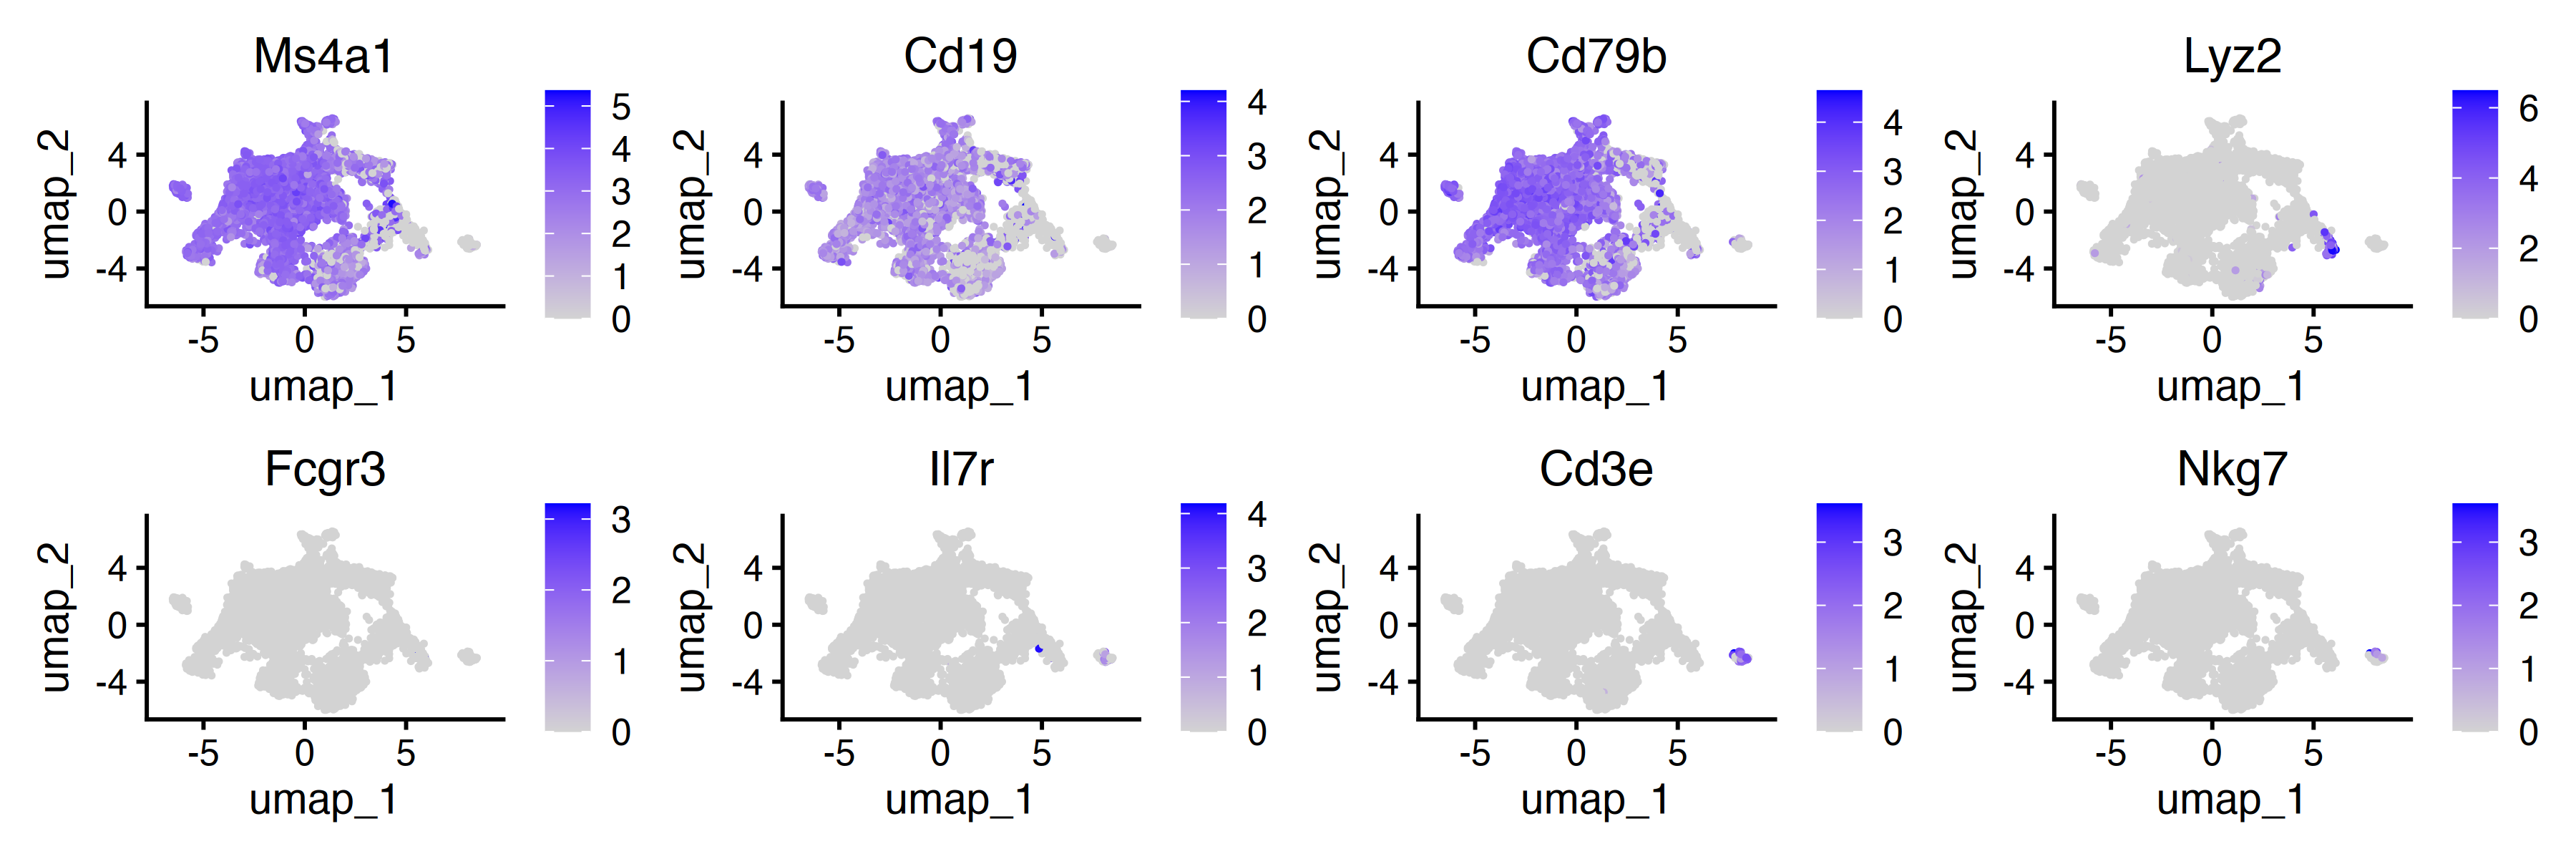

In [458]:
options(repr.plot.width=12, repr.plot.height=4)
FeaturePlot(srat,c('Ms4a1','Cd19','Cd79b','Lyz2','Fcgr3','Il7r','Cd3e','Nkg7'),ncol=4)

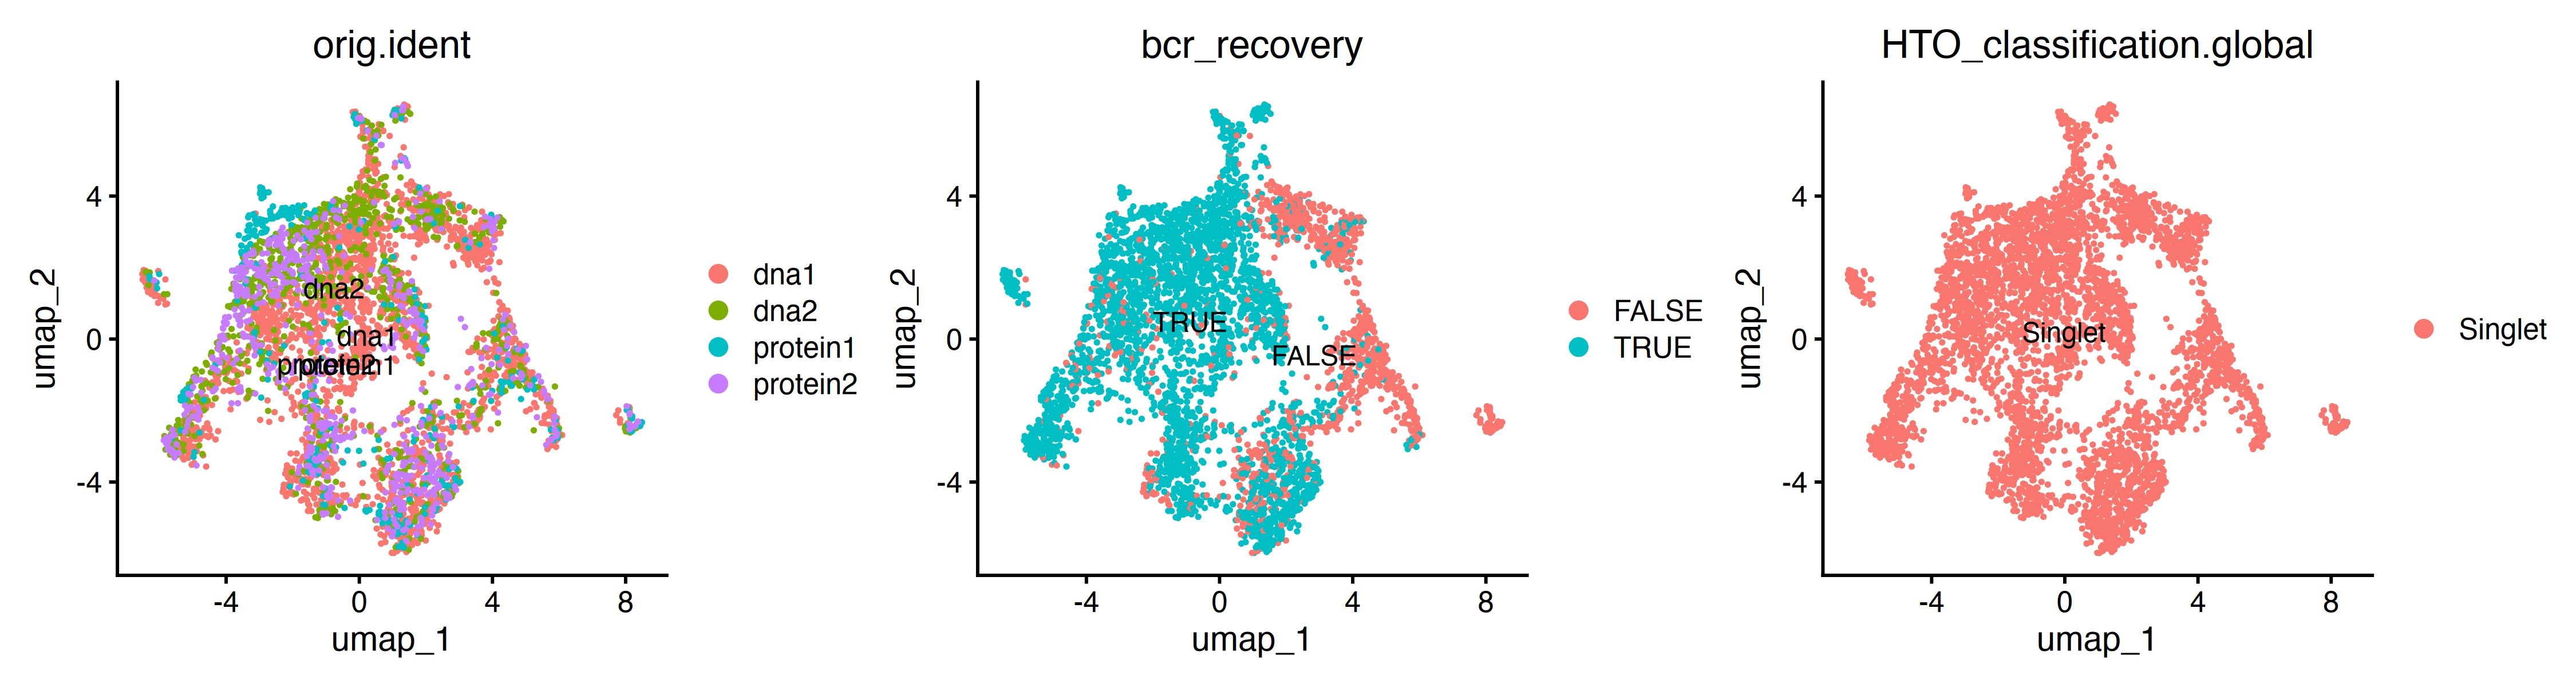

In [446]:
options(repr.plot.width=15, repr.plot.height=4)
DimPlot(test.srat, group.by=c('orig.ident','bcr_recovery','HTO_classification.global'), label = TRUE)


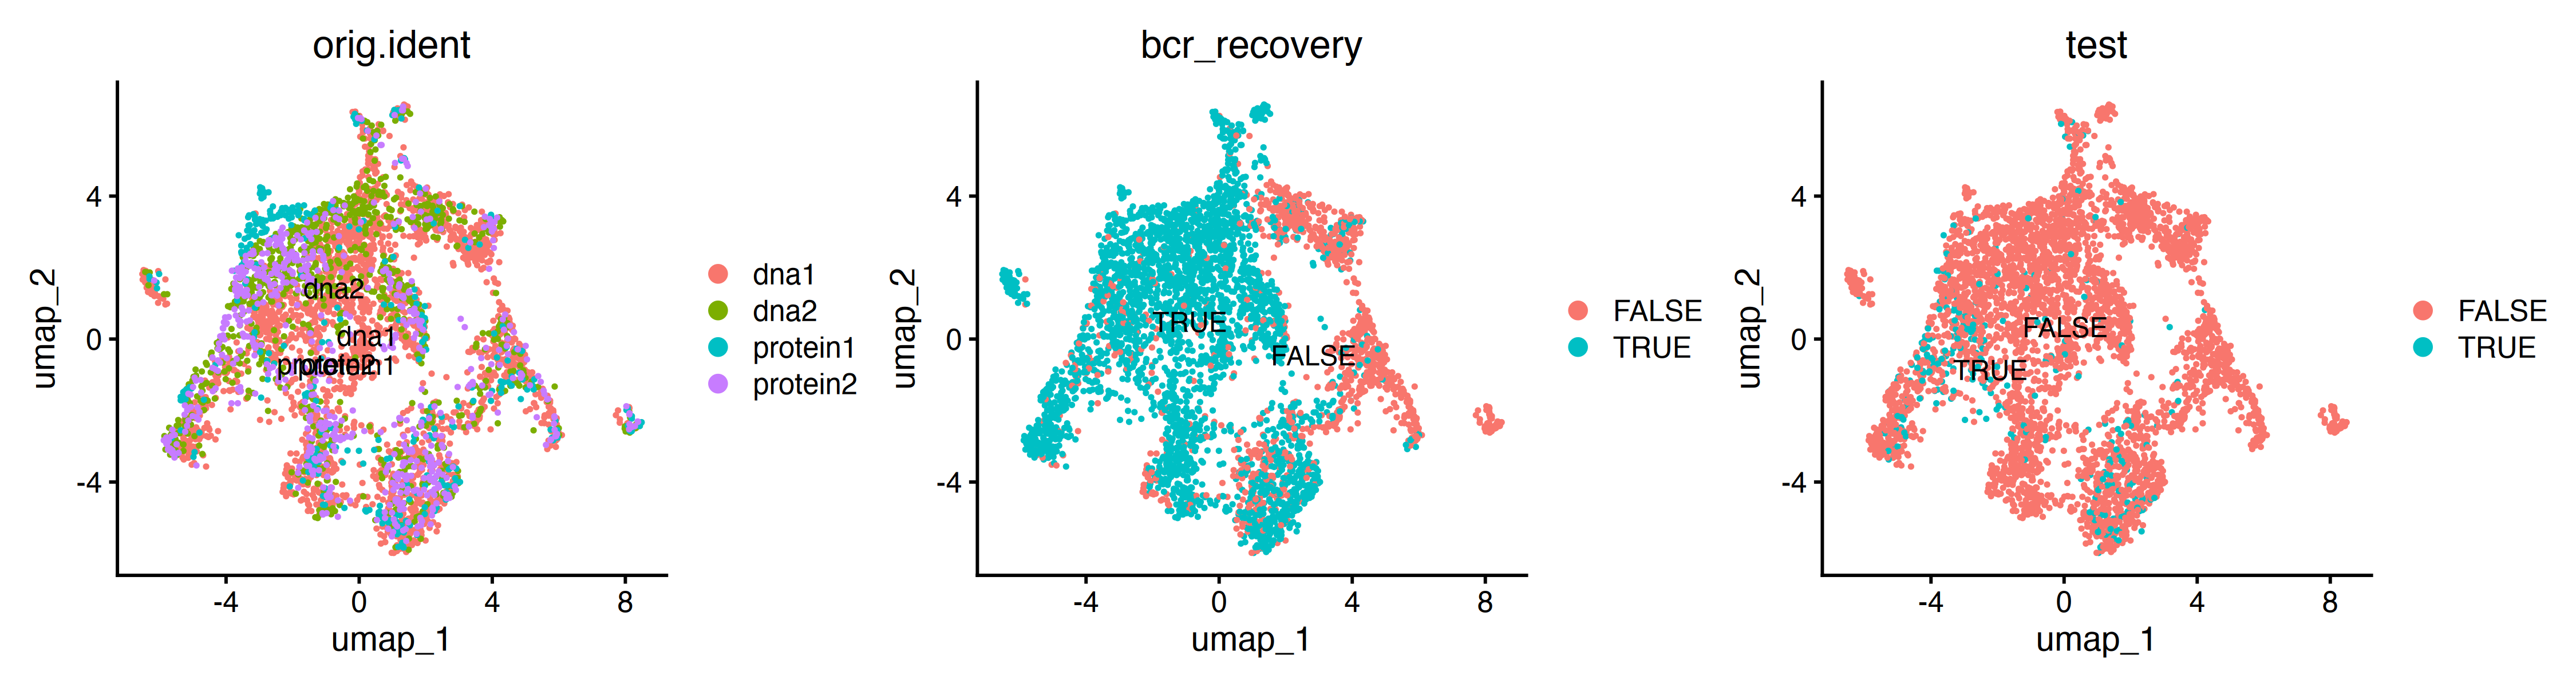

In [181]:
# check if sequences with lower alignment score is due to fake cell 
test = vdj1 %>% filter(align.score<200, mouse_v_score<200)
test.srat = srat
test.srat$test = test.srat$cell_id %in% test$cell_id
options(repr.plot.width=15, repr.plot.height=4)
DimPlot(test.srat, group.by=c('orig.ident','bcr_recovery','test'), label = TRUE)


In [183]:
# keep cells with bcr recovered 
srat2 = subset(srat,subset= cell_id %in% vdj1$cell_id)
srat2 <- ScaleData(srat2,vars.to.regress=c('nFeature_RNA','percent.mt'), verbose=FALSE)
srat2 <- RunPCA(srat2,verbose=FALSE)
srat2 <- FindNeighbors(srat2, dims = 1:30, verbose=FALSE)
srat2 <- RunUMAP(srat2,dims = 1:30, verbose=FALSE)
srat2 <- FindClusters(srat2, resolution = c(0.1,0.3,0.5, 0.7), verbose=FALSE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


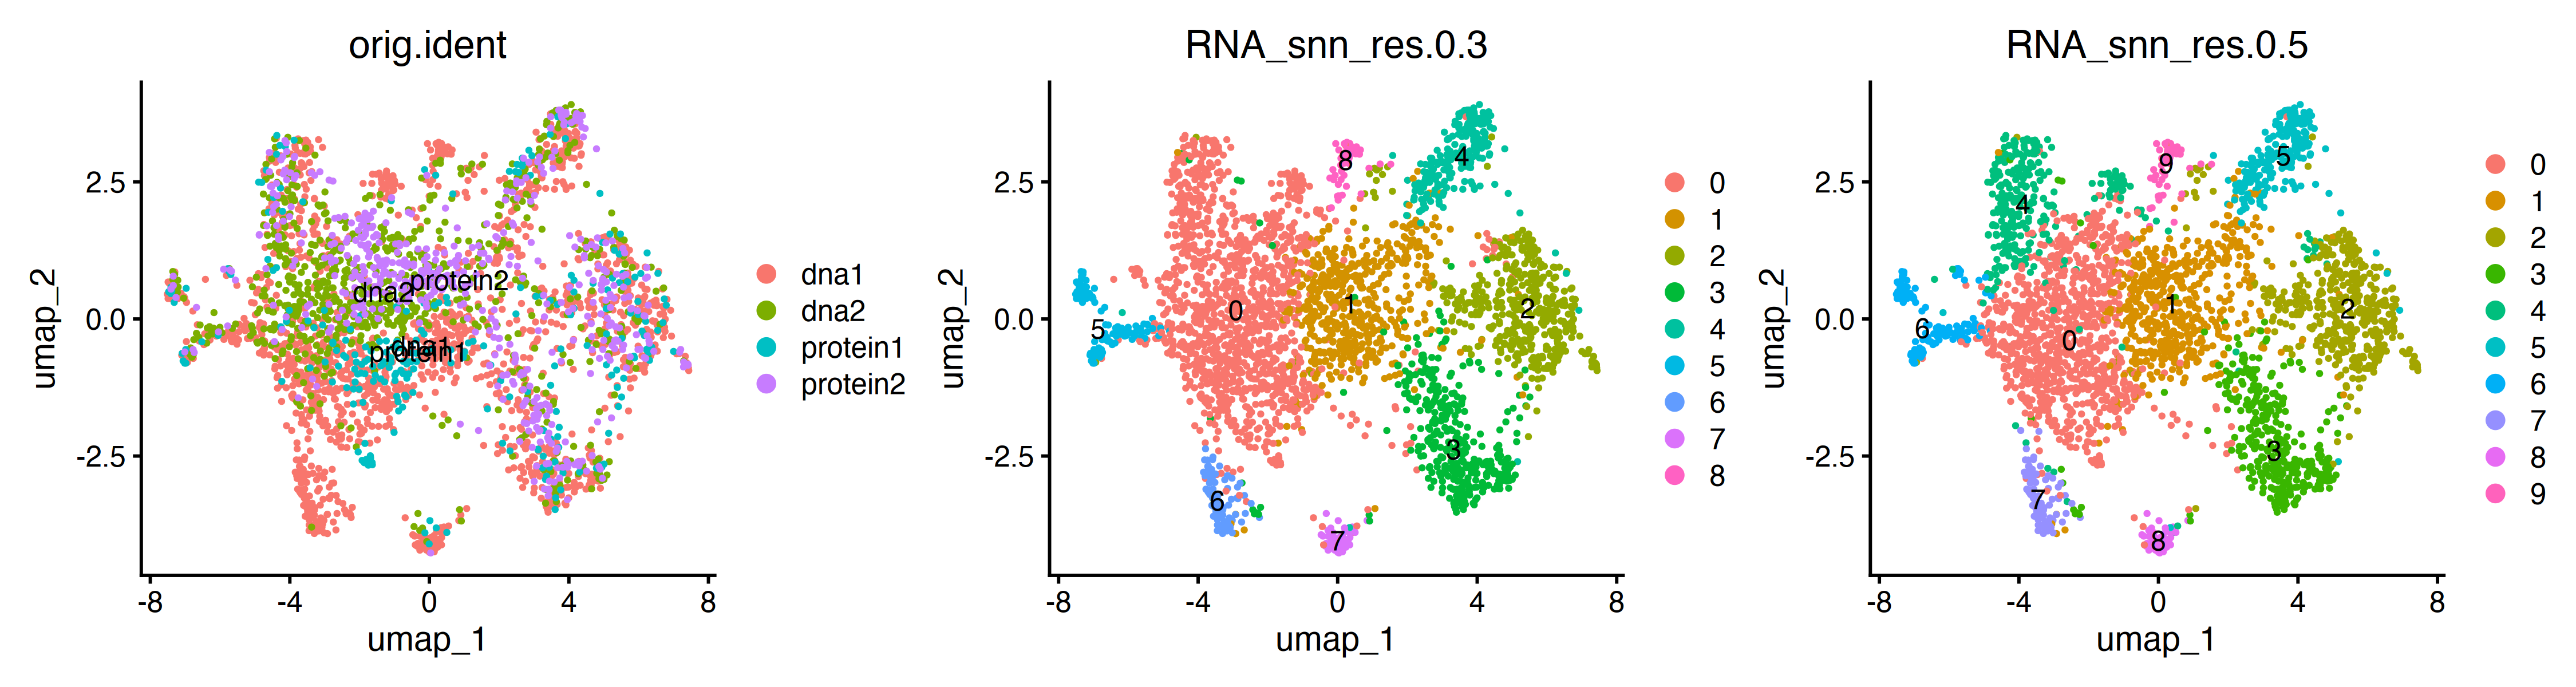

In [186]:
options(repr.plot.width=15, repr.plot.height=4)
DimPlot(srat2, group.by=c('orig.ident','RNA_snn_res.0.3','RNA_snn_res.0.5'), label = TRUE)


Warning message:
“All cells have the same value (1) of “bcr_recovery””
Warning message:
“All cells have the same value (0) of “Nkg7””


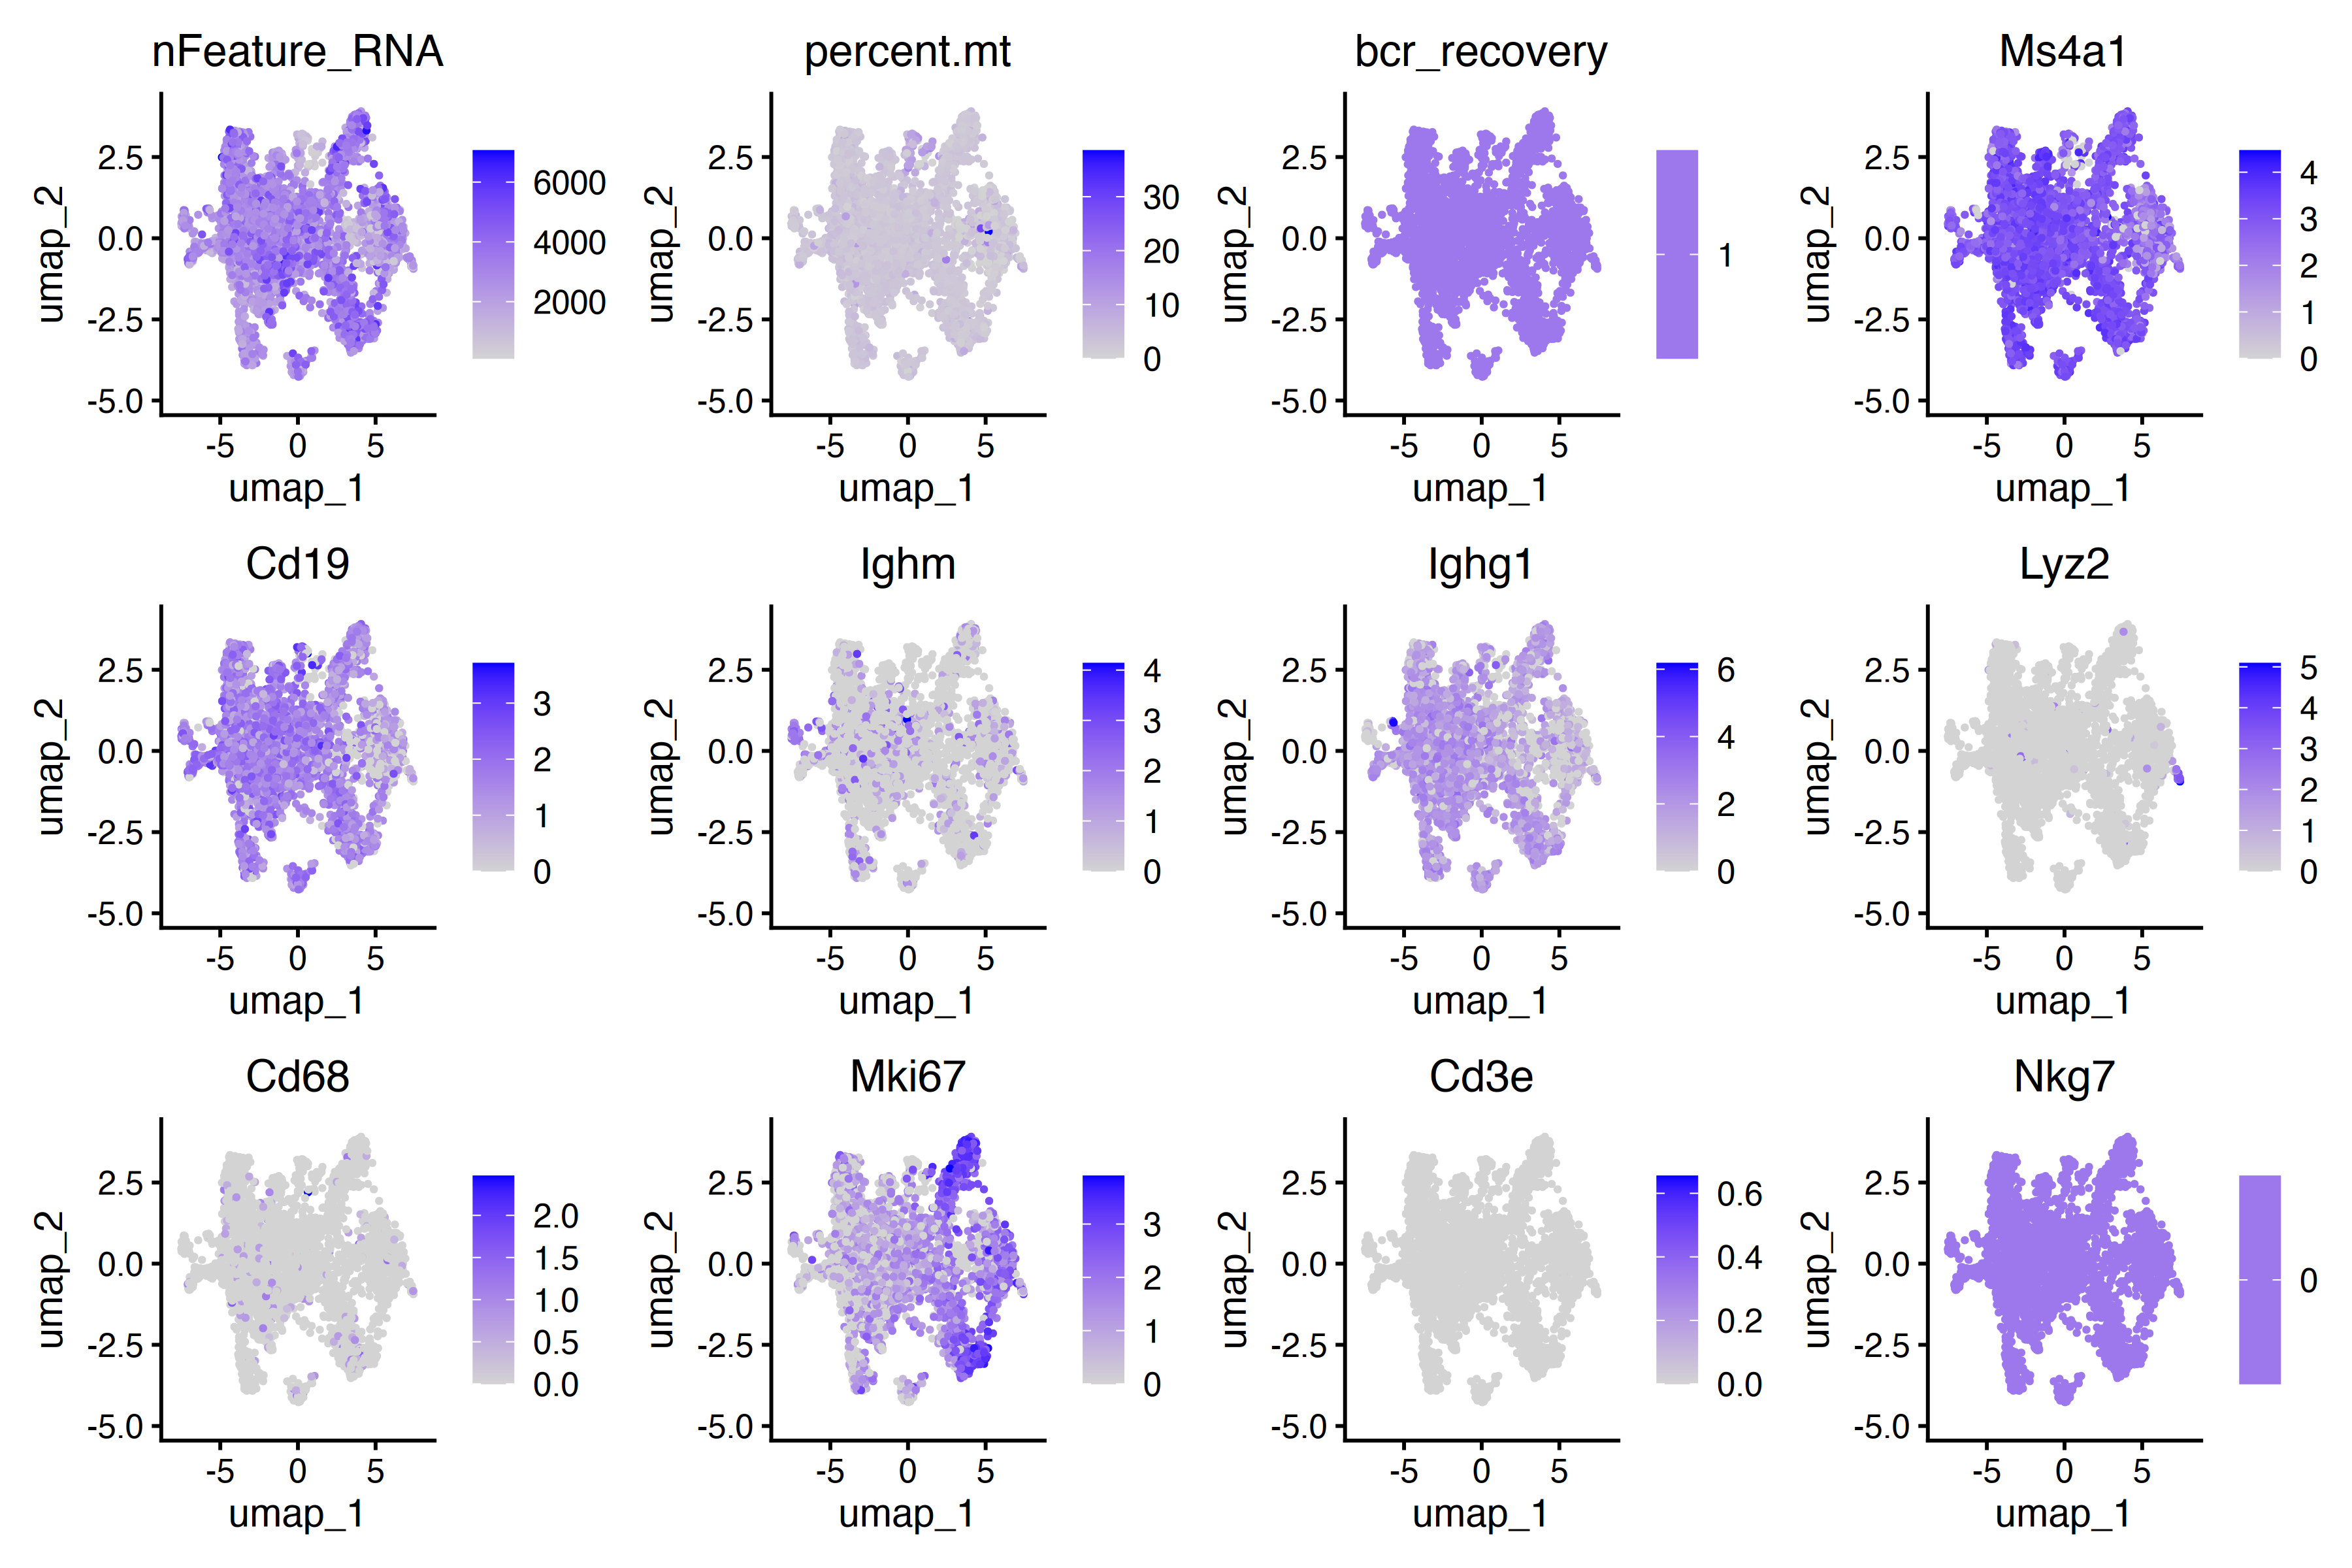

In [185]:
options(repr.plot.width=12, repr.plot.height=8)
FeaturePlot(srat2,c('nFeature_RNA','percent.mt','bcr_recovery','Ms4a1','Cd19','Ighm','Ighg1','Lyz2','Cd68','Mki67','Cd3e','Nkg7'))

In [187]:
saveRDS(srat2,'seurat_objects/02_vdj_matched.RDS')

In [188]:
srat2

An object of class Seurat 
16497 features across 3075 samples within 2 assays 
Active assay: RNA (16493 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: HTO
 2 dimensional reductions calculated: pca, umap

In [189]:
table(srat2$orig.ident)
table(vdj1$sample)
table(vdj2$sample)


    dna1     dna2 protein1 protein2 
    1533      746      264      532 


    dna1     dna2 protein1 protein2 
    1533      746      264      532 


    dna1     dna2 protein1 protein2 
    1533      746      264      532 

In [ ]:
# somatic hypermutation

In [27]:
raw.df = read.csv('denovo_igblast/00_compiled_vdj.csv',row.names=1) %>% 
mutate(cell_id = paste(sample,str_split_i(sequence_id,'_',1),sep='_')) %>%
filter(cell_id %in% vdj2$cell_id)
head(raw.df,1)

sequence_id                
1 AAACCCCAGGCGGTTT-1_contig_1
  sequence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1 GGGGTACTTATGAGAATAGCAGTAATTAGCTAGGGACCAAAATTCAAAGACAAAATGGATTTTCAAGTGCAGATTTTCAGCTTCCTGCTAATCAGTGCTTCAGTCATAATGTCCAGAGGACAAATTGTTCTCTCCCAGTCTCCAGCAATCCTGTCTGCATCTCCAGGGGAGAAGGTCACAATGACTTGCAGGGCCAGCTCAAGTGTAACTTACATGCACTGGTACCAGCAGAAGCCAGGATCCTCCCCCAAACCCTGGATTTATGCCACATCCAGCCTGGCTTCTGGAGTCCCTGTTCGCTTCAGTGGCAGTGGGTCTGGGACCTCCTACTCTCTCACAATCAGCAGAGTGGAGGCTGAAGATGCTGCCACTTATTACTGCCAGCAGTGGAGTAGTAACCCACGGACGTTCGGTGGAGGCACCAAGCTGGAAATCAAACGGGCTGATGCTGCACCAACTGTATCCATCTTCCCACCATCCAGTGAGCAGTTAACATCTGGAGGTGCCTCAGTCGTGTGCTTC
  rev_comp productive v_call      d_call j_call  
1 FALSE    TRUE       IGKV4-72*01        IGKJ1*01
  sequence_alignment                                                                                                                                                                                                                                                                                                                                                                
1 CAAATTGTTCTCTCCCAGTCTCCAGCAATCCTGTCTGCATCTCCAGGGGAGAAGGTCACAATGACTTGCAGGGCCAGCTCAAGTGTA.....................ACTTACATGCACTGGTACCAGCAGAAGCCAGGATCCTCCCCCAAACCCTGGATTTATGCCACA.....................TCCAGCCTGGCTTCTGGAGTCCCT...GTTCGCTTCAGTGGCAGTGGG......TCTGGGACCTCCTACTCTCTCACAATCAGCAGAGTGGAGGCTGAAGATGCTGCCACTTATTACTGCCAGCAGTGGAGTAGTAACCCACGGACGTTCGGTGGAGGCACCAAGCTGGAAATCAAAC
  germline_alignment                                                                                                                                                                                                                                                                                                                                                                
1 CAAATTGTTCTCTCCCAGTCTCCAGCAATCCTGTCTGCATCTCCAGGGGAGAAGGTCACAATGACTTGCAGGGCCAGCTCAAGTGTA.....................AGTTACATGCACTGGTACCAGCAGAAGCCAGGATCCTCCCCCAAACCCTGGATTTATGCCACA.....................TCCAACCTGGCTTCTGGAGTCCCT...GCTCGCTTCAGTGGCAGTGGG......TCTGGGACCTCTTACTCTCTCACAATCAGCAGAGTGGAGGCTGAAGATGCTGCCACTTATTACTGCCAGCAGTGGAGTAGTAACCCACGGACGTTCGGTGGAGGCACCAAGCTGGAAATCAAAC
  junction                          ⋯
1 TGCCAGCAGTGGAGTAGTAACCCACGGACGTTC ⋯
  fwr1                                                                          
1 CAAATTGTTCTCTCCCAGTCTCCAGCAATCCTGTCTGCATCTCCAGGGGAGAAGGTCACAATGACTTGCAGGGCCAGC
  fwr2                                               
1 ATGCACTGGTACCAGCAGAAGCCAGGATCCTCCCCCAAACCCTGGATTTAT
  fwr3                                                                                                                 
1 AGCCTGGCTTCTGGAGTCCCT...GTTCGCTTCAGTGGCAGTGGG......TCTGGGACCTCCTACTCTCTCACAATCAGCAGAGTGGAGGCTGAAGATGCTGCCACTTATTACTGC
  fwr4                            cdr1                                
1 TTCGGTGGAGGCACCAAGCTGGAAATCAAAC TCAAGTGTA.....................ACTTAC
  cdr2                           cdr3                        sample
1 GCCACA.....................TCC CAGCAGTGGAGTAGTAACCCACGGACG dna1  
  group           cell_id                
1 d30_60mer-PADRE dna1_AAACCCCAGGCGGTTT-1

In [28]:
raw.df %>% colnames()

[1] "sequence_id"        "sequence"           "rev_comp"          
 [4] "productive"         "v_call"             "d_call"            
 [7] "j_call"             "sequence_alignment" "germline_alignment"
[10] "junction"           "junction_aa"        "v_cigar"           
[13] "d_cigar"            "j_cigar"            "stop_codon"        
[16] "vj_in_frame"        "locus"              "junction_length"   
[19] "np1_length"         "np2_length"         "v_sequence_start"  
[22] "v_sequence_end"     "v_germline_start"   "v_germline_end"    
[25] "d_sequence_start"   "d_sequence_end"     "d_germline_start"  
[28] "d_germline_end"     "j_sequence_start"   "j_sequence_end"    
[31] "j_germline_start"   "j_germline_end"     "v_score"           
[34] "v_identity"         "v_support"          "d_score"           
[37] "d_identity"         "d_support"          "j_score"           
[40] "j_identity"         "j_support"          "fwr1"              
[43] "fwr2"               "fwr3"               "fwr4"              
[46] "cdr1"               "cdr2"               "cdr3"              
[49] "sample"             "group"              "cell_id"

In [29]:
head(vdj2) %>% select(v_call_hc, d_call_hc, j_call_hc)

v_call_hc    d_call_hc                         j_call_hc        
1 IGHV1-67*01  IGHD2-13*01,IGHD6-5*01            IGHJ3*01,IGHJ3*02
2 IGHV1-9*01   IGHD3-3*01                        IGHJ3*01         
3 IGHV1-2human IGHD5-1*01                        IGHJ1*01         
4 IGHV3-2*02   IGHD4-1*01,IGHD4-1*02             IGHJ1*01         
5 IGHV1-2human IGHD2-14*01                       IGHJ3*01,IGHJ3*02
6 IGHV1-2human IGHD1-1*02,IGHD2-1*01,IGHD2-10*01 IGHJ3*01

In [37]:
# somatic hypermutation analysis
# for each sequence, pull out its v_call_hc, d_call_hc, j_call_hc,
# based on them, go into reference and construct the corresponding germline sequence,
# align the current sequence against this germline sequence, then calculate the number of mismatches (mutations), 
# store it in a new column called shm_count
library(Biostrings)
library(stringr)
library(purrr)


Attaching package: ‘purrr’


The following object is masked from ‘package:XVector’:

    compact


The following object is masked from ‘package:IRanges’:

    reduce




In [31]:
# Load reference FASTA
ref_all <- readDNAStringSet("VCR01_mouse_VDJ_db.fasta")

# Extract clean gene names: IGHV1-2, IGHD2-5, etc.
ref_names_clean <- str_extract(names(ref_all), "IGH[V|D|J][^*\\s]+")
names(ref_all) <- ref_names_clean

# Split into V, D, J sets
v_ref <- ref_all[grepl("^IGHV", names(ref_all))]
d_ref <- ref_all[grepl("^IGHD", names(ref_all))]
j_ref <- ref_all[grepl("^IGHJ", names(ref_all))]

# Function to construct germline sequence from gene names
get_germline <- function(v, d, j) {
  if (is.na(v) || !(v %in% names(v_ref))) return(NA_character_)
  if (is.na(j) || !(j %in% names(j_ref))) return(NA_character_)
  
  v_seq <- as.character(v_ref[[v]])
  j_seq <- as.character(j_ref[[j]])
  
  # Mask D region with Ns if valid
  if (!is.na(d) && d %in% names(d_ref)) {
    d_len <- nchar(as.character(d_ref[[d]]))  
    d_mask <- paste0(rep("N", d_len), collapse = "")
    paste0(v_seq, d_mask, j_seq)
  } else {
    paste0(v_seq, j_seq)
  }
}

# Mismatch counter via pairwise alignment
score_subs <- nucleotideSubstitutionMatrix(match = 1, mismatch = -1)

count_mismatches <- function(obs_seq, germ_seq) {
  if (is.na(germ_seq)) return(NA_integer_)
  
  aln <- pairwiseAlignment(
    pattern = DNAString(obs_seq),
    subject = DNAString(germ_seq),
    type = "local",
    substitutionMatrix = score_subs,
    gapOpening = -5,
    gapExtension = -2
  )
  
  pat <- strsplit(as.character(pattern(aln)), "")[[1]]
  sub <- strsplit(as.character(subject(aln)), "")[[1]]
  
  # Only count mismatches where germline is NOT 'N'
  sum(pat != sub & sub != "N")
}


In [38]:
vdj2 <- vdj2 %>%
  mutate(
    v_trim = str_split_i(v_call_hc, "\\*", 1),
    d_trim = str_split_i(d_call_hc, "\\*", 1),
    j_trim = str_split_i(j_call_hc, "\\*", 1)
  ) %>%
  mutate(
    germline_hc = pmap_chr(list(v_trim, d_trim, j_trim), get_germline),
    shm_count = map2_int(sequence_hc, germline_hc, count_mismatches)
  )

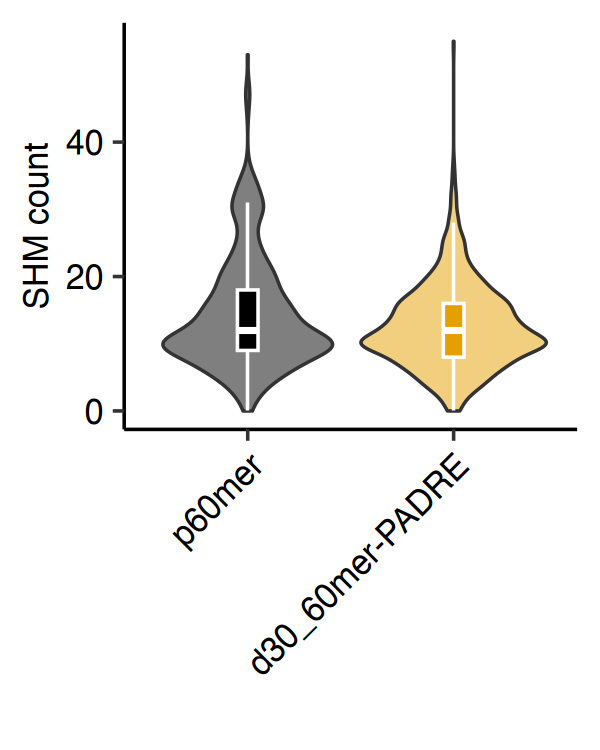

In [42]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=2)
vdj2 %>% 
ggplot(aes(x=group,y=shm_count))+ theme_classic() +
geom_violin(aes(fill=group),alpha=0.5,linewidth=0.3)+
geom_boxplot(aes(fill=group),color='white',width=0.1,outlier.shape=NA,linewidth=0.3)+
Axis_themes+
scale_fill_manual(values = group.pal)+
labs(x='',y='SHM count')+
theme(legend.position = "none")

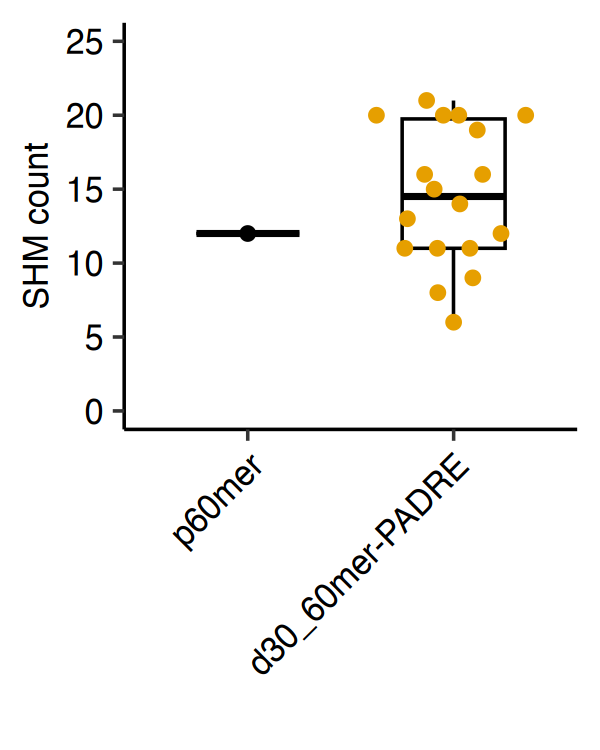

In [40]:
options(repr.plot.res=300, repr.plot.height=2.5, repr.plot.width=2)
vdj2 %>% filter(is.vrc01) %>%
ggplot(aes(x=group,y=shm_count))+ theme_classic() +
geom_boxplot(fill='white',color='black',width=0.5,outlier.shape=NA,linewidth=0.3)+
geom_quasirandom(aes(color=group),size=1)+
scale_y_continuous(limits=c(0,25))+
Axis_themes+
scale_color_manual(values = group.pal)+
labs(x='',y='SHM count')+
theme(legend.position = "none")

In [43]:
summary(vdj2$shm_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    9.00   12.00   13.01   16.00   55.00 

In [44]:
write.csv(vdj2,'denovo_igblast/03_paired_vdj_vrc01enrich_shm.csv')

In [45]:
# clonal analysis
library(data.table)
library(stringdist)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following object is masked from ‘package:IRanges’:

    shift


The following objects are masked from ‘package:S4Vectors’:

    first, second


The following objects are masked from ‘package:dplyr’:

    between, first, last


Warning message:
“package ‘stringdist’ was built under R version 4.3.3”


In [47]:
colnames(vdj1)
colnames(vdj2)

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"    "align.score"    "hash.ID"        "animal_id"     
[37] "is.vrc01"

[1] "sample"         "barcode"        "cell_id"        "group"         
 [5] "contig_id_hc"   "length_hc"      "reads_hc"       "umis_hc"       
 [9] "v_call_hc"      "d_call_hc"      "j_call_hc"      "locus_hc"      
[13] "cdr1_hc"        "cdr2_hc"        "cdr3_hc"        "junction_hc"   
[17] "junction_aa_hc" "sequence_hc"    "mouse_v_score"  "contig_id_lc"  
[21] "length_lc"      "reads_lc"       "umis_lc"        "v_call_lc"     
[25] "d_call_lc"      "j_call_lc"      "locus_lc"       "cdr1_lc"       
[29] "cdr2_lc"        "cdr3_lc"        "junction_lc"    "junction_aa_lc"
[33] "sequence_lc"    "align.score"    "hash.ID"        "animal_id"     
[37] "is.vrc01"       "v_trim"         "d_trim"         "j_trim"        
[41] "germline_hc"    "shm_count"

In [266]:
# vdj1$hash.ID = srat$hash.ID[match(vdj1$cell_id, srat$cell_id)]
# vdj1 = vdj1 %>% mutate(animal_id = paste(sample,hash.ID,sep='_'))

# vdj2$hash.ID = srat$hash.ID[match(vdj2$cell_id, srat$cell_id)]
# vdj2 = vdj2 %>% mutate(animal_id = paste(sample,hash.ID,sep='_'))

# vdj3$hash.ID = srat$hash.ID[match(vdj3$cell_id, srat$cell_id)]
# vdj3 = vdj3 %>% mutate(animal_id = paste(sample,hash.ID,sep='_'))

In [51]:
table(vdj1$animal_id, vdj1$sample)

                         
                          dna1 dna2 protein1 protein2
  dna1_TotalSeq-C0301      479    0        0        0
  dna1_TotalSeq-C0303      906    0        0        0
  dna1_TotalSeq-C0304      114    0        0        0
  dna2_TotalSeq-C0301        0  304        0        0
  dna2_TotalSeq-C0302        0  103        0        0
  dna2_TotalSeq-C0303        0   52        0        0
  dna2_TotalSeq-C0304        0  287        0        0
  protein1_TotalSeq-C0301    0    0      155        0
  protein1_TotalSeq-C0302    0    0       52        0
  protein1_TotalSeq-C0304    0    0       51        0
  protein2_TotalSeq-C0301    0    0        0      277
  protein2_TotalSeq-C0304    0    0        0      218

In [61]:
# define private clone
# grouped cells by animal_id must use the same v_call_hc, j_call_hc, junction_hc
vdj2 = vdj2 %>% group_by(animal_id, v_call_hc, j_call_hc, junction_hc) %>%
mutate(private_clone_id = cur_group_id()) %>% ungroup()
# define public clone
# cells using the same v_call_hc, j_call_hc, v_call_lc, j_call_lc, junction_aa_hc, junction_aa_lc, coming from different animals
vdj2 = vdj2 %>% group_by(v_call_hc, j_call_hc, junction_aa_hc) %>%
  mutate(n_animals = n_distinct(animal_id)) %>%
  mutate(public_clone_id = if_else(n_animals > 1, cur_group_id(), NA_integer_)) %>%  ungroup()  


In [63]:
write.csv(vdj2,'denovo_igblast/03_paired_vdj_vrc01enrich_shm_clone.csv')

In [62]:
colnames(vdj2)

[1] "sample"           "barcode"          "cell_id"          "group"           
 [5] "contig_id_hc"     "length_hc"        "reads_hc"         "umis_hc"         
 [9] "v_call_hc"        "d_call_hc"        "j_call_hc"        "locus_hc"        
[13] "cdr1_hc"          "cdr2_hc"          "cdr3_hc"          "junction_hc"     
[17] "junction_aa_hc"   "sequence_hc"      "mouse_v_score"    "contig_id_lc"    
[21] "length_lc"        "reads_lc"         "umis_lc"          "v_call_lc"       
[25] "d_call_lc"        "j_call_lc"        "locus_lc"         "cdr1_lc"         
[29] "cdr2_lc"          "cdr3_lc"          "junction_lc"      "junction_aa_lc"  
[33] "sequence_lc"      "align.score"      "hash.ID"          "animal_id"       
[37] "is.vrc01"         "v_trim"           "d_trim"           "j_trim"          
[41] "germline_hc"      "shm_count"        "private_clone_id" "clone_size"      
[45] "bin"              "n_animals"        "public_clone_id"

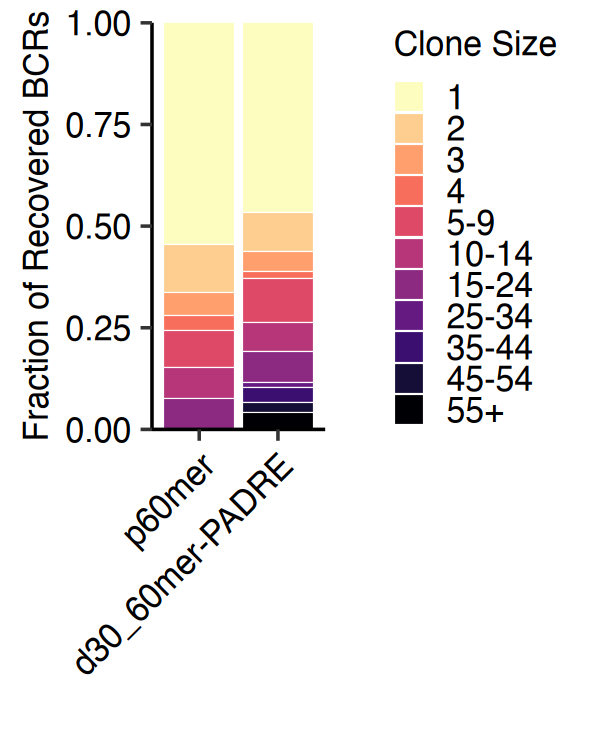

In [54]:
options(repr.plot.width=2,repr.plot.height=2.5,repr.plot.res=300  )
# Count number of cells per clonotype
clone_size = vdj2 %>% count(group, private_clone_id, sort = TRUE) 
vdj2$clone_size = clone_size$n[match(vdj2$private_clone_id, clone_size$private_clone_id)] 

vdj2 = vdj2 %>%
  mutate(bin = cut(clone_size, breaks = c(0, 1, 2, 3, 4, 9, seq(14, 55, 10), 100),include.lowest = TRUE,
                   labels = c(1,2,3,4,'5-9','10-14',paste(seq(15, 45, 10), seq(24, 55, 10), sep = "-"), "55+")))

vdj2 %>%
ggplot(aes(x = group, fill = bin)) + theme_classic() +
geom_bar(position = 'fill', color = 'white', linewidth = 0.1) +
labs(x = '', y = 'Fraction of Recovered BCRs', fill = 'Clone Size') +
scale_fill_viridis(discrete = TRUE, direction = -1, option = 'magma', na.value = 'grey') +
guides(fill = guide_legend(keywidth = 0.5, keyheight = 0.2, ncol = 1)) +
scale_y_continuous(expand = c(0, 0)) +
Axis_themes


In [55]:
vdj2 %>% mutate(is.vrc01.clone = v_call_hc == 'IGHV1-2human' & nchar(junction_aa_lc)==7) %>% count(group,private_clone_id,is.vrc01.clone) %>%
group_by(group, is.vrc01.clone) %>% summarise(count=n(), expanded=sum(n>1), size=if (expanded[1] < 10) paste(n[n > 1], collapse = ",") else "...")

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group           is.vrc01.clone count expanded size 
1 p60mer          FALSE           493   84      ...  
2 p60mer           TRUE             1    0           
3 d30_60mer-PADRE FALSE          1253  215      ...  
4 d30_60mer-PADRE  TRUE            12    3      2,2,5

In [56]:
library(ggseqlogo)

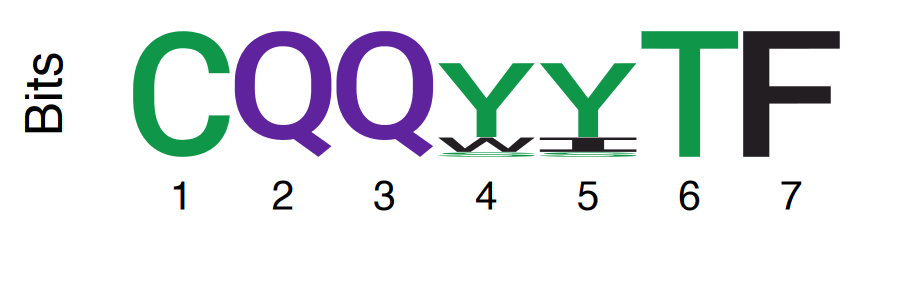

In [57]:
# logo plot of vrc01 class ligth chains 
options(repr.plot.width=3,repr.plot.height=1,repr.plot.res=300  )
df4gg = vdj2 %>% filter(is.vrc01) 
ggseqlogo(df4gg$junction_aa_lc, method = "bits") + 
theme(legend.key.size = unit(.3, 'cm'),legend.position = "none",axis.text.y=element_blank())


In [98]:
# combine final seurat for GEO submission 
srat = readRDS('seurat_objects/01_QCed_seurat.RDS')
srat
colnames(srat@meta.data)

An object of class Seurat 
16497 features across 4192 samples within 2 assays 
Active assay: RNA (16493 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: HTO
 2 dimensional reductions calculated: pca, umap

[1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "nCount_HTO"               
 [5] "nFeature_HTO"              "HTO_maxID"                
 [7] "HTO_secondID"              "HTO_margin"               
 [9] "HTO_classification"        "HTO_classification.global"
[11] "hash.ID"                   "barcode"                  
[13] "cell_id"                   "percent.mt"               
[15] "RNA_snn_res.0.1"           "RNA_snn_res.0.3"          
[17] "RNA_snn_res.0.5"           "RNA_snn_res.0.7"          
[19] "seurat_clusters"           "group"

In [99]:
# remove useless things 
srat@meta.data = srat@meta.data %>% select(-c(HTO_maxID, HTO_secondID, HTO_margin, HTO_classification,RNA_snn_res.0.1,
                                              RNA_snn_res.0.3,RNA_snn_res.0.5, RNA_snn_res.0.7, seurat_clusters))
colnames(srat@meta.data)
head(srat@meta.data,1)

[1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "nCount_HTO"               
 [5] "nFeature_HTO"              "HTO_classification.global"
 [7] "hash.ID"                   "barcode"                  
 [9] "cell_id"                   "percent.mt"               
[11] "group"

orig.ident nCount_RNA nFeature_RNA nCount_HTO
dna1_AAACCCCAGGCGGTTT-1 dna1       7555       2295         978       
                        nFeature_HTO HTO_classification.global hash.ID       
dna1_AAACCCCAGGCGGTTT-1 3            Singlet                   TotalSeq-C0303
                        barcode            cell_id                 percent.mt
dna1_AAACCCCAGGCGGTTT-1 AAACCCCAGGCGGTTT-1 dna1_AAACCCCAGGCGGTTT-1 1.495698  
                        group          
dna1_AAACCCCAGGCGGTTT-1 d30_60mer-PADRE

In [100]:
vdj = read.csv('denovo_igblast/03_paired_vdj_vrc01enrich_shm_clone.csv', row.names=1)
head(vdj,1)
colnames(vdj)

sample barcode            cell_id                 group          
1 dna1   AAACCCCAGGCGGTTT-1 dna1_AAACCCCAGGCGGTTT-1 d30_60mer-PADRE
  contig_id_hc                     length_hc reads_hc umis_hc v_call_hc  
1 dna1_AAACCCCAGGCGGTTT-1_contig_5 362       1401     7       IGHV1-67*01
  d_call_hc              ⋯ v_trim   d_trim   j_trim
1 IGHD2-13*01,IGHD6-5*01 ⋯ IGHV1-67 IGHD2-13 IGHJ3 
  germline_hc                                                                                                                                                                                                                                                                                                                                                            
1 CAGGTCCAGCTGCAGCAGTCTGGGCCTGAGCTGGTGAGGCCTGGGGTCTCAGTGAAGATTTCCTGCAAGGGTTCCGGCTACACATTCACTGATTATGCTATGCACTGGGTGAAACAGAGTCATGCAAAGAGTCTAGAGTGGATTGGAGTTATTAGTACTTACTATGGTGATGCTAGCTACAACCAGAAGTTCAAGGACAAGGCCACAATGACTGTAGACAAATCCTCCAGCACAGCCTATATGGAACTTGCCAGACTGACATCTGAGGACTCTGCCGTCTATTACTGTGCAAGANNNNNNNNNNNNNNNNNCCTGGTTTGCTTACTGGGGCCAAGGGACTCTGGTCACTGTCTCTGCAG
  shm_count private_clone_id clone_size bin   n_animals public_clone_id
1 10        485              54         45-54 12        725

[1] "sample"           "barcode"          "cell_id"          "group"           
 [5] "contig_id_hc"     "length_hc"        "reads_hc"         "umis_hc"         
 [9] "v_call_hc"        "d_call_hc"        "j_call_hc"        "locus_hc"        
[13] "cdr1_hc"          "cdr2_hc"          "cdr3_hc"          "junction_hc"     
[17] "junction_aa_hc"   "sequence_hc"      "mouse_v_score"    "contig_id_lc"    
[21] "length_lc"        "reads_lc"         "umis_lc"          "v_call_lc"       
[25] "d_call_lc"        "j_call_lc"        "locus_lc"         "cdr1_lc"         
[29] "cdr2_lc"          "cdr3_lc"          "junction_lc"      "junction_aa_lc"  
[33] "sequence_lc"      "align.score"      "hash.ID"          "animal_id"       
[37] "is.vrc01"         "v_trim"           "d_trim"           "j_trim"          
[41] "germline_hc"      "shm_count"        "private_clone_id" "clone_size"      
[45] "bin"              "n_animals"        "public_clone_id"

In [101]:
# trim vdj 
vdj.merge = vdj %>% select(-c(sample, barcode, group, hash.ID, v_trim,d_trim,j_trim))
colnames(vdj.merge)

[1] "cell_id"          "contig_id_hc"     "length_hc"        "reads_hc"        
 [5] "umis_hc"          "v_call_hc"        "d_call_hc"        "j_call_hc"       
 [9] "locus_hc"         "cdr1_hc"          "cdr2_hc"          "cdr3_hc"         
[13] "junction_hc"      "junction_aa_hc"   "sequence_hc"      "mouse_v_score"   
[17] "contig_id_lc"     "length_lc"        "reads_lc"         "umis_lc"         
[21] "v_call_lc"        "d_call_lc"        "j_call_lc"        "locus_lc"        
[25] "cdr1_lc"          "cdr2_lc"          "cdr3_lc"          "junction_lc"     
[29] "junction_aa_lc"   "sequence_lc"      "align.score"      "animal_id"       
[33] "is.vrc01"         "germline_hc"      "shm_count"        "private_clone_id"
[37] "clone_size"       "bin"              "n_animals"        "public_clone_id"

In [102]:
srat = subset(srat, cell_id %in% vdj.merge$cell_id)
srat
nrow(vdj.merge)

An object of class Seurat 
16497 features across 2998 samples within 2 assays 
Active assay: RNA (16493 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: HTO
 2 dimensional reductions calculated: pca, umap

[1] 2998

In [103]:
# merge vdj info into seurat metadata 
srat@meta.data = merge(srat@meta.data, vdj.merge, by='cell_id')
rownames(srat@meta.data) = srat$cell_id

In [104]:
colnames(srat@meta.data)
head(srat@meta.data,1)

[1] "cell_id"                   "orig.ident"               
 [3] "nCount_RNA"                "nFeature_RNA"             
 [5] "nCount_HTO"                "nFeature_HTO"             
 [7] "HTO_classification.global" "hash.ID"                  
 [9] "barcode"                   "percent.mt"               
[11] "group"                     "contig_id_hc"             
[13] "length_hc"                 "reads_hc"                 
[15] "umis_hc"                   "v_call_hc"                
[17] "d_call_hc"                 "j_call_hc"                
[19] "locus_hc"                  "cdr1_hc"                  
[21] "cdr2_hc"                   "cdr3_hc"                  
[23] "junction_hc"               "junction_aa_hc"           
[25] "sequence_hc"               "mouse_v_score"            
[27] "contig_id_lc"              "length_lc"                
[29] "reads_lc"                  "umis_lc"                  
[31] "v_call_lc"                 "d_call_lc"                
[33] "j_call_lc"                 "locus_lc"                 
[35] "cdr1_lc"                   "cdr2_lc"                  
[37] "cdr3_lc"                   "junction_lc"              
[39] "junction_aa_lc"            "sequence_lc"              
[41] "align.score"               "animal_id"                
[43] "is.vrc01"                  "germline_hc"              
[45] "shm_count"                 "private_clone_id"         
[47] "clone_size"                "bin"                      
[49] "n_animals"                 "public_clone_id"

cell_id                 orig.ident nCount_RNA
dna1_AAACCCCAGGCGGTTT-1 dna1_AAACCCCAGGCGGTTT-1 dna1       7555      
                        nFeature_RNA nCount_HTO nFeature_HTO
dna1_AAACCCCAGGCGGTTT-1 2295         978        3           
                        HTO_classification.global hash.ID       
dna1_AAACCCCAGGCGGTTT-1 Singlet                   TotalSeq-C0303
                        barcode            percent.mt ⋯ align.score
dna1_AAACCCCAGGCGGTTT-1 AAACCCCAGGCGGTTT-1 1.495698   ⋯ 7          
                        animal_id           is.vrc01
dna1_AAACCCCAGGCGGTTT-1 dna1_TotalSeq-C0303 FALSE   
                        germline_hc                                                                                                                                                                                                                                                                                                                                                            
dna1_AAACCCCAGGCGGTTT-1 CAGGTCCAGCTGCAGCAGTCTGGGCCTGAGCTGGTGAGGCCTGGGGTCTCAGTGAAGATTTCCTGCAAGGGTTCCGGCTACACATTCACTGATTATGCTATGCACTGGGTGAAACAGAGTCATGCAAAGAGTCTAGAGTGGATTGGAGTTATTAGTACTTACTATGGTGATGCTAGCTACAACCAGAAGTTCAAGGACAAGGCCACAATGACTGTAGACAAATCCTCCAGCACAGCCTATATGGAACTTGCCAGACTGACATCTGAGGACTCTGCCGTCTATTACTGTGCAAGANNNNNNNNNNNNNNNNNCCTGGTTTGCTTACTGGGGCCAAGGGACTCTGGTCACTGTCTCTGCAG
                        shm_count private_clone_id clone_size bin   n_animals
dna1_AAACCCCAGGCGGTTT-1 10        485              54         45-54 12       
                        public_clone_id
dna1_AAACCCCAGGCGGTTT-1 725

In [105]:
saveRDS(srat,'seurat_objects/03_multiomic_seurat.RDS')

In [593]:
# define private clone
# grouped cells by animal_id must use the same v_call_hc, j_call_hc, junction_hc
vdj3 = vdj3 %>% group_by(animal_id, v_call_hc, j_call_hc, junction_hc) %>%
mutate(private_clone_id = cur_group_id()) %>% ungroup()
# define public clone
# cells using the same v_call_hc, j_call_hc, v_call_lc, j_call_lc, junction_aa_hc, junction_aa_lc, coming from different animals
vdj3 = vdj3 %>% group_by(v_call_hc, j_call_hc, v_call_lc, j_call_lc, junction_aa_hc, junction_aa_lc) %>%
  mutate(n_animals = n_distinct(animal_id)) %>%
  mutate(public_clone_id = if_else(n_animals > 1, cur_group_id(), NA_integer_)) %>%  ungroup()  


In [595]:
vdj3 %>% mutate(is.vrc01.clone = v_call_hc == 'IGHV1-2human' & nchar(junction_aa_lc)==7) %>% count(group,private_clone_id,is.vrc01.clone) %>%
group_by(group, is.vrc01.clone) %>% summarise(count=n(), expanded=sum(n>1), size=if (expanded[1] < 10) paste(n[n > 1], collapse = ",") else "...")

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group           is.vrc01.clone count expanded size 
1 p60mer          FALSE           490   83      ...  
2 p60mer           TRUE             4    1      2    
3 d30_60mer-PADRE FALSE          1252  215      ...  
4 d30_60mer-PADRE  TRUE            13    3      2,2,5

In [422]:
# options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300  )
# vdj2 %>% count(n_animals,private_clone_id) %>% count(n_animals) %>%
# ggplot(aes(x=n_animals,y=n)) +
# theme_classic()+
# geom_text(aes(label=n),size=3,hjust = -0.1)+
# geom_col()+
# coord_flip()+
# scale_y_log10(expand=c(0,0),limits=c(1,13000),breaks = c(1, 10, 100, 1000))+
# labs(x='Number of animalsin the\npublic clone', y='Number of private clones')+
# Axis_themes

# options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300  )
# vdj2 %>% count(n_animals) %>% 
# ggplot(aes(x=n_animals,y=n)) +
# theme_classic()+
# geom_text(aes(label=n),size=3,hjust = -0.1)+
# geom_col()+
# coord_flip()+
# scale_y_log10(expand=c(0,0),limits=c(1,20000),breaks = c(1, 10, 100, 1000))+
# labs(x='Number of animalsin the\npublic clone', y='Count of recovered BCRs')+
# Axis_themes


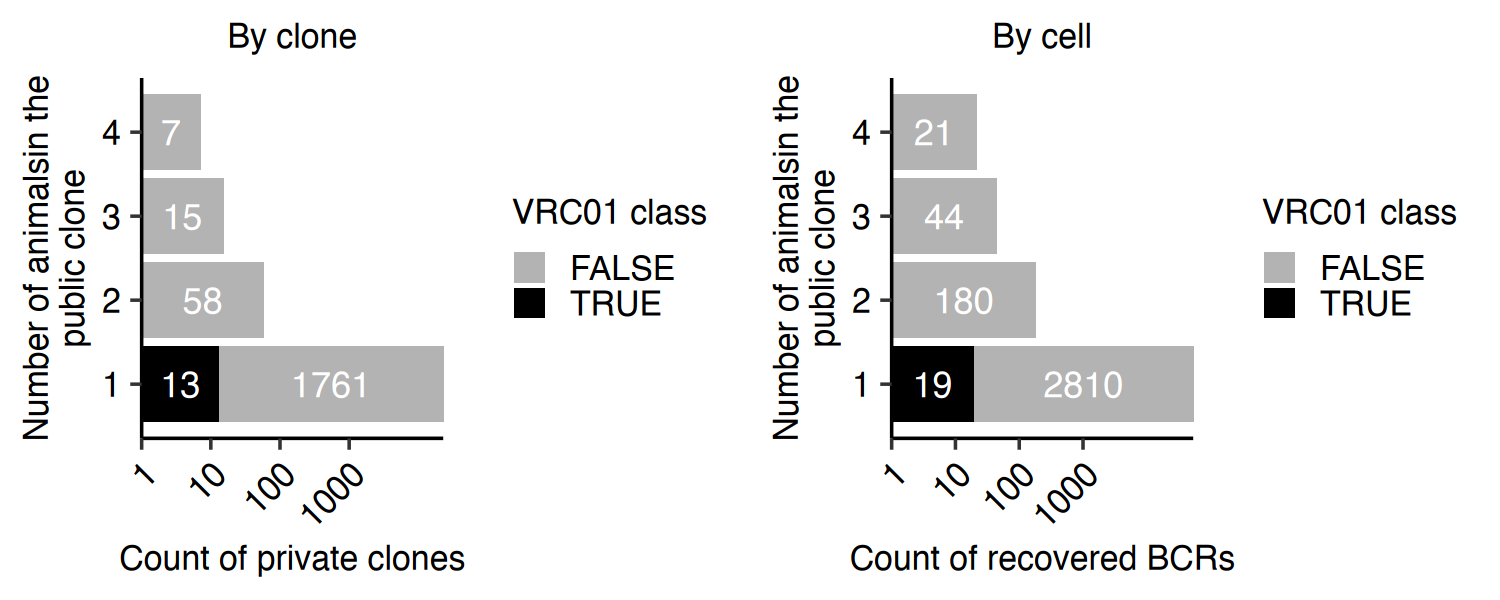

In [491]:
options(repr.plot.width=5,repr.plot.height=2,repr.plot.res=300  )
p1 = vdj2 %>% count(n_animals,private_clone_id,is.vrc01) %>% count(n_animals,is.vrc01) %>%
ggplot(aes(x=n_animals,y=n,fill=is.vrc01)) +
theme_classic()+
geom_bar(position='stack',stat='identity')+
geom_text(aes(label=n),position = position_stack(vjust = 0.5), size=3, color = "white")+
coord_flip()+
scale_y_log10(expand=c(0,0),breaks = c(1, 10, 100, 1000))+
scale_fill_manual(values = c("grey70", "black")) +
labs(x='Number of animalsin the\npublic clone', y='Count of private clones',fill='VRC01 class',title='By clone')+
Axis_themes

p2= vdj2 %>% count(n_animals,is.vrc01) %>% 
ggplot(aes(x=n_animals,y=n,fill=is.vrc01)) +
theme_classic()+
geom_bar(position='stack',stat='identity')+
geom_text(aes(label=n),position = position_stack(vjust = 0.5), size=3, color = "white")+
coord_flip()+
scale_y_log10(expand=c(0,0),breaks = c(1, 10, 100, 1000))+
scale_fill_manual(values = c("grey70", "black")) +
labs(x='Number of animalsin the\npublic clone', y='Count of recovered BCRs',fill='VRC01 class',title='By cell')+
Axis_themes

cowplot::plot_grid(p1,p2)

In [ ]:
# clonal definition by similarity threshold

In [267]:
# check similarity threshold 
# heavy
# Step 1: Add CDR3 length column
df4gg = vdj1 %>% mutate(cdr3_len = nchar(junction_hc)) 

# Step 2: Group and filter out singleton groups
df_grouped <- df4gg %>% group_by(animal_id, v_call_hc, j_call_hc, cdr3_len) %>% filter(n() > 1) %>% ungroup()

# Step 3: Compute pairwise normalized Hamming distances
hd_data <- df_grouped %>%
  group_by(v_call_hc, j_call_hc, cdr3_len) %>%
  summarise(
    distances = list({
      cdr3s <- junction_hc
      len <- unique(cdr3_len)
      combs <- combn(cdr3s, 2, simplify = FALSE)
      sapply(combs, function(x) stringdist(x[1], x[2], method = "hamming") / len)
    }),.groups = "drop") %>%
  tidyr::unnest(distances) %>% rename(hamming_frac = distances)
summary(hd_data$hamming_frac)
dim(hd_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.07555 0.06061 0.63333 

[1] 69943     4

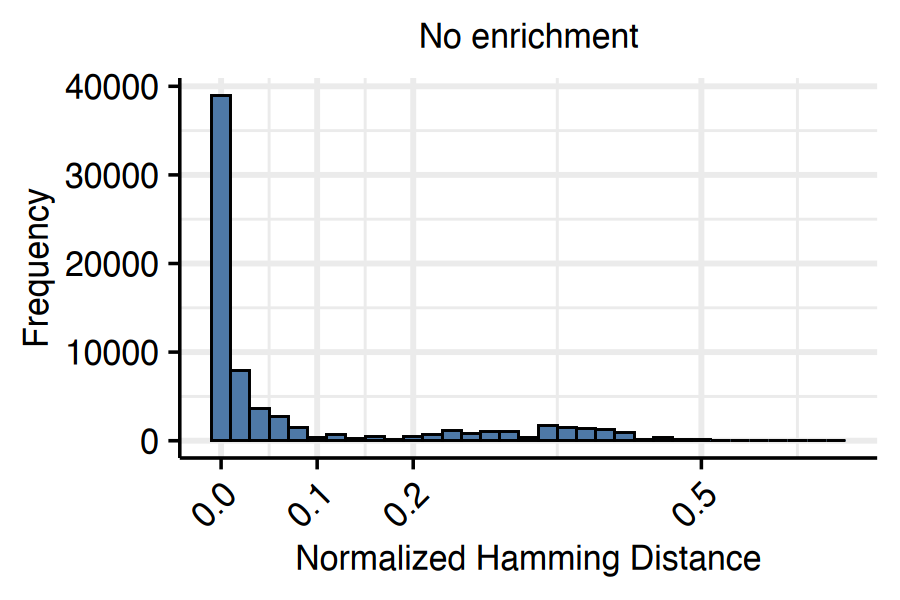

In [268]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300  )
# Step 4: Plot histogram
ggplot(hd_data, aes(x = hamming_frac)) +
geom_histogram(binwidth = 0.02, fill = "#4E79A7", color = "black",linewidth=0.25) +
scale_x_continuous(breaks=c(0,0.1,0.2,0.5,0.7))+
  theme_minimal() +
  labs(x = "Normalized Hamming Distance",y = "Frequency",title='No enrichment')+
Axis_themes

In [269]:
# check similarity threshold 
# heavy
# Step 1: Add CDR3 length column
df4gg = vdj2 %>% mutate(cdr3_len = nchar(junction_hc)) 

# Step 2: Group and filter out singleton groups
df_grouped <- df4gg %>% group_by(animal_id, v_call_hc, j_call_hc, cdr3_len) %>% filter(n() > 1) %>% ungroup()

# Step 3: Compute pairwise normalized Hamming distances
hd_data <- df_grouped %>%
  group_by(v_call_hc, j_call_hc, cdr3_len) %>%
  summarise(
    distances = list({
      cdr3s <- junction_hc
      len <- unique(cdr3_len)
      combs <- combn(cdr3s, 2, simplify = FALSE)
      sapply(combs, function(x) stringdist(x[1], x[2], method = "hamming") / len)
    }),.groups = "drop") %>%
  tidyr::unnest(distances) %>% rename(hamming_frac = distances)
summary(hd_data$hamming_frac)
dim(hd_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.02778 0.10281 0.19444 0.78947 

[1] 52779     4

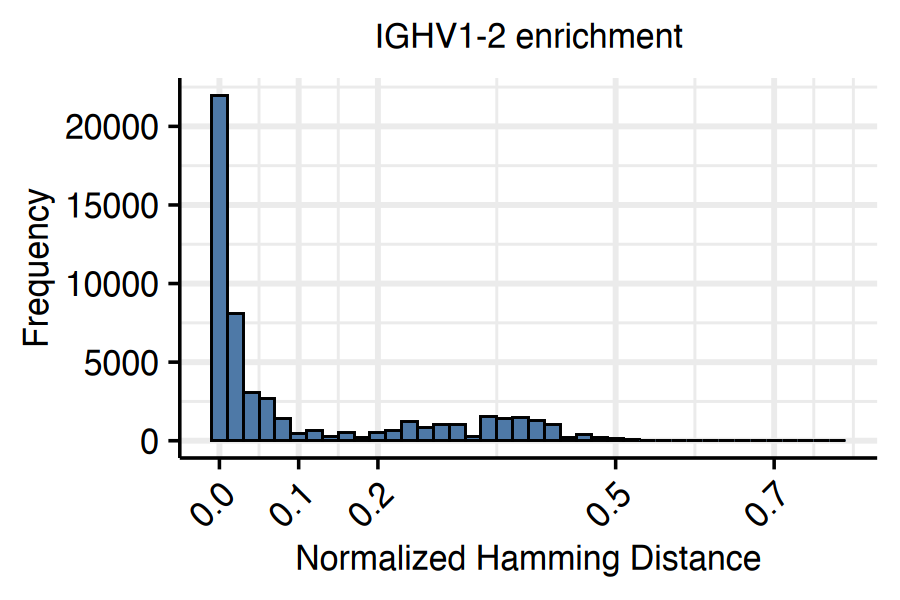

In [270]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300  )
# Step 4: Plot histogram
ggplot(hd_data, aes(x = hamming_frac)) +
geom_histogram(binwidth = 0.02, fill = "#4E79A7", color = "black",linewidth=0.25) +
scale_x_continuous(breaks=c(0,0.1,0.2,0.5,0.7))+
  theme_minimal() +
  labs(x = "Normalized Hamming Distance",y = "Frequency",title='IGHV1-2 enrichment')+
Axis_themes

In [269]:
# check similarity threshold 
# heavy
# Step 1: Add CDR3 length column
df4gg = vdj2 %>% mutate(cdr3_len = nchar(junction_hc)) 

# Step 2: Group and filter out singleton groups
df_grouped <- df4gg %>% group_by(animal_id, v_call_hc, j_call_hc, cdr3_len) %>% filter(n() > 1) %>% ungroup()

# Step 3: Compute pairwise normalized Hamming distances
hd_data <- df_grouped %>%
  group_by(v_call_hc, j_call_hc, cdr3_len) %>%
  summarise(
    distances = list({
      cdr3s <- junction_hc
      len <- unique(cdr3_len)
      combs <- combn(cdr3s, 2, simplify = FALSE)
      sapply(combs, function(x) stringdist(x[1], x[2], method = "hamming") / len)
    }),.groups = "drop") %>%
  tidyr::unnest(distances) %>% rename(hamming_frac = distances)
summary(hd_data$hamming_frac)
dim(hd_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.02778 0.10281 0.19444 0.78947 

[1] 52779     4

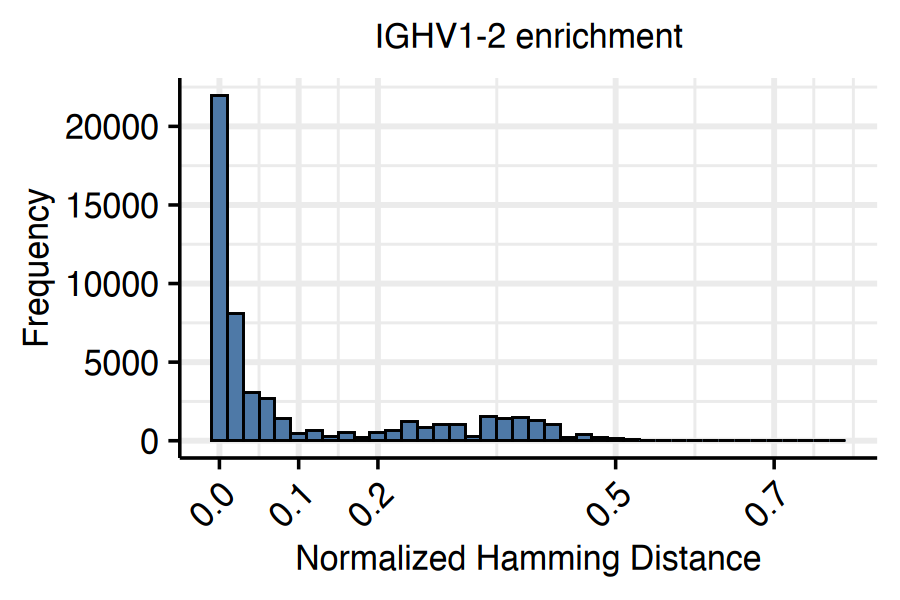

In [270]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300  )
# Step 4: Plot histogram
ggplot(hd_data, aes(x = hamming_frac)) +
geom_histogram(binwidth = 0.02, fill = "#4E79A7", color = "black",linewidth=0.25) +
scale_x_continuous(breaks=c(0,0.1,0.2,0.5,0.7))+
  theme_minimal() +
  labs(x = "Normalized Hamming Distance",y = "Frequency",title='IGHV1-2 enrichment')+
Axis_themes

In [287]:
# check similarity threshold for public clone
# heavy
# Step 1: Add CDR3 length column
df4gg = vdj2 %>% mutate(cdr3_len = nchar(junction_aa_hc)) 

# Step 2: Group and filter out singleton groups
df_grouped <- df4gg %>% group_by(v_call_hc, j_call_hc, cdr3_len) %>% filter(n() > 1) %>% ungroup()

# Step 3: Compute pairwise normalized Hamming distances
hd_data <- df_grouped %>%
  group_by(v_call_hc, j_call_hc, cdr3_len) %>%
  summarise(
    distances = list({
      cdr3s <- junction_aa_hc
      len <- unique(cdr3_len)
      combs <- combn(cdr3s, 2, simplify = FALSE)
      sapply(combs, function(x) stringdist(x[1], x[2], method = "hamming") / len)
    }),.groups = "drop") %>%
  tidyr::unnest(distances) %>% rename(hamming_frac = distances)
summary(hd_data$hamming_frac)
dim(hd_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.08333 0.19520 0.38462 1.00000 

[1] 59374     4

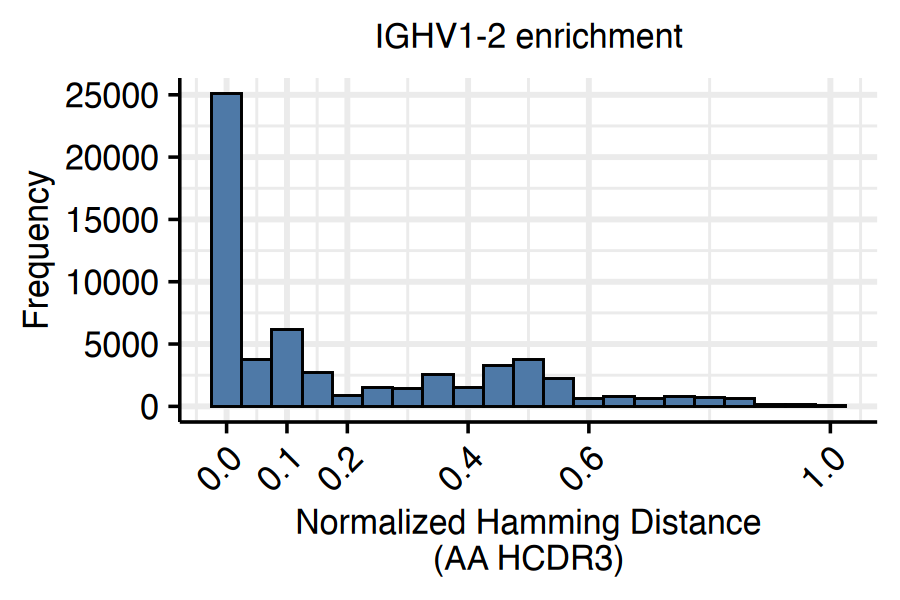

In [289]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300  )
# Step 4: Plot histogram
ggplot(hd_data, aes(x = hamming_frac)) +
geom_histogram(binwidth = 0.05, fill = "#4E79A7", color = "black",linewidth=0.25) +
scale_x_continuous(breaks=c(0,0.1,0.2,0.4,0.6,1))+
  theme_minimal() +
  labs(x = "Normalized Hamming Distance\n(AA HCDR3)",y = "Frequency",title='IGHV1-2 enrichment')+
Axis_themes

In [275]:
# check similarity threshold 
# heavy
# Step 1: Add CDR3 length column
df4gg = vdj3 %>% mutate(cdr3_len = nchar(junction_lc)) 

# Step 2: Group and filter out singleton groups
df_grouped <- df4gg %>% group_by(animal_id, v_call_lc, j_call_lc, cdr3_len) %>% filter(n() > 1) %>% ungroup()

# Step 3: Compute pairwise normalized Hamming distances
hd_data <- df_grouped %>%
  group_by(v_call_lc, j_call_lc, cdr3_len) %>%
  summarise(
    distances = list({
      cdr3s <- junction_lc
      len <- unique(cdr3_len)
      combs <- combn(cdr3s, 2, simplify = FALSE)
      sapply(combs, function(x) stringdist(x[1], x[2], method = "hamming") / len)
    }),.groups = "drop") %>%
  tidyr::unnest(distances) %>% rename(hamming_frac = distances)
summary(hd_data$hamming_frac)
dim(hd_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.03030 0.03104 0.06061 0.27273 

[1] 60480     4

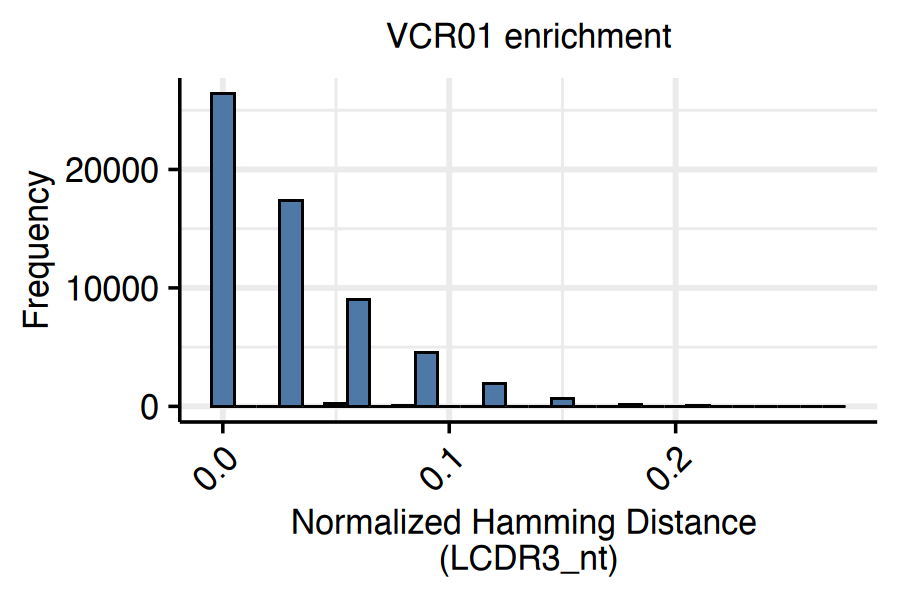

In [276]:
options(repr.plot.width=3,repr.plot.height=2,repr.plot.res=300  )
# Step 4: Plot histogram
ggplot(hd_data, aes(x = hamming_frac)) +
geom_histogram(binwidth = 0.01, fill = "#4E79A7", color = "black",linewidth=0.25) +
scale_x_continuous(breaks=c(0,0.1,0.2,0.5,0.7))+
  theme_minimal() +
  labs(x = "Normalized Hamming Distance \n(LCDR3_nt)",y = "Frequency",title='VCR01 enrichment')+
Axis_themes

In [ ]:
library(stringdist)
library(purrr)

In [420]:
# define clones based on similarity threshold 
# for cells in each animal_id, a clone is defined by using the same v_call_hc, j_call_hc, length of junction_hc , 85% similarity junction_hc, same v_call_lc, j_call_lc, and 100% identity junction_lc

# Function to cluster by 85% identity for junction_hc
cluster_by_junction_hc_similarity <- function(df, threshold = 0.85) {
  if (nrow(df) == 1) {
    df$private_clone_id <- paste0("cl1")
    return(df)
  }
  
  # Compute normalized Levenshtein distance matrix
  dm <- stringdistmatrix(df$junction_hc, df$junction_hc, method = "lv")
  max_len <- outer(nchar(df$junction_hc), nchar(df$junction_hc), pmax)
  sim <- 1 - (dm / max_len)
  dist_matrix <- as.dist(1 - sim)
  
  hc <- hclust(dist_matrix, method = "average")
  clusters <- cutree(hc, h = 1 - threshold)
  
  df$private_clone_id <- paste0("cl", clusters)
  return(df)
}

vdj2_private <- vdj2 %>% mutate(junction_hc_length = nchar(junction_hc)) %>%
  group_by(animal_id,v_call_hc, j_call_hc, junction_hc_length, v_call_lc, j_call_lc, junction_lc ) %>%
  group_split() %>%  
  map_df(~ cluster_by_junction_hc_similarity(.x, threshold = 0.85)) %>% ungroup() %>%
  mutate(private_clone_id = paste0(animal_id, "_", v_call_hc, "_", j_call_hc, "_", v_call_lc, "_", j_call_lc, "_", junction_lc, "_", private_clone_id))



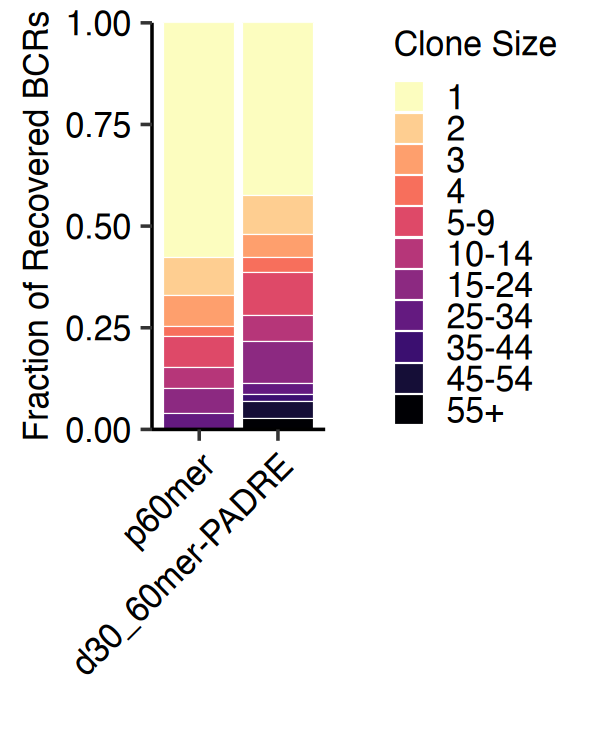

In [421]:
options(repr.plot.width=2,repr.plot.height=2.5,repr.plot.res=300  )
# Count number of cells per clonotype
clone_size = vdj2_private %>% count(group, private_clone_id, sort = TRUE) 
vdj2_private$clone_size = clone_size$n[match(vdj2_private$private_clone_id, clone_size$private_clone_id)] 

vdj2_private = vdj2_private %>%
  mutate(bin = cut(clone_size, breaks = c(0, 1, 2, 3, 4, 9, seq(14, 55, 10), 100),include.lowest = TRUE,
                   labels = c(1,2,3,4,'5-9','10-14',paste(seq(15, 45, 10), seq(24, 55, 10), sep = "-"), "55+")))

vdj2_private %>%
ggplot(aes(x = group, fill = bin)) + theme_classic() +
geom_bar(position = 'fill', color = 'white', linewidth = 0.1) +
labs(x = '', y = 'Fraction of Recovered BCRs', fill = 'Clone Size') +
scale_fill_viridis(discrete = TRUE, direction = -1, option = 'magma', na.value = 'grey') +
guides(fill = guide_legend(keywidth = 0.5, keyheight = 0.2, ncol = 1)) +
scale_y_continuous(expand = c(0, 0)) +
Axis_themes
